# Plotting the variables for ensemble runs

Notes: 
+ enabled reading data on Baseline


## Tips Baseline
1. Use *pyces* env
2. 

In [1]:
import os,glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import socket
#yimport pyreadr # to read .rds files

## Some Useful functions


In [2]:
def print_dict_tree(d, indent=0):
    """
    Print the tree of the dictionary
    """
    for key, value in d.items():
        print(' ' * indent + str(key))
        if isinstance(value, dict):
            print_dict_tree(value, indent + 4)

### Check which machine you are on! The path names will vary accordingly

In [3]:
machine_name = socket.gethostname()
if "baseline" in machine_name:
    print("We are on: baseline")

elif "or-slurm" in machine_name:
    print ("We are on: cades")

elif "MAC132004" in machine_name:
    print("We are on: macbook")
else:
    print("other than baseline, cades, or LAB macbook")


We are on: baseline


Copy all the fates_parameter files from ad_spinup run dir to following path. 
Use `rsync_params.sh`!

In [4]:
# Paths
if "baseline" in machine_name:
    path_params_head = "/gpfs/wolf2/cades/cli185/scratch/ud4/FATES_Outputs/runs/UQ/params/"
    path_processed_head = "/gpfs/wolf2/cades/cli185/scratch/ud4/FATES_Outputs/runs/"
    path_ensemble_vals = "/ccsopen/home/ud4/models/OLMT/data/lnd/clm2/paramdata/ensemble/"

if "MAC132004" in machine_name:
    path_params_head = "/Users/ud4/FATESMDS_analysis/outputs/runs/tests_alp/2024/UQ/params/"
    path_processed_head = "/Users/ud4/FATESMDS_analysis/outputs/runs/tests_alp/2024/"

In [5]:
N_ensembles=10
if False:
    params_list = ["fates_cnp_vmax_nh4","fates_cnp_vmax_no3","fates_cnp_vmax_p"]
    path_save = "/gpfs/wolf2/cades/cli185/scratch/ud4/Results/EN_Vmax/"
    ensemble_vals_fname = "bs_Vmax3_parm_vals"
if True:
    params_list = ["fates_alloc_storage_cushion","fates_cnp_nitr_store_ratio","fates_cnp_phos_store_ratio"]
    path_save = "/gpfs/wolf2/cades/cli185/scratch/ud4/Results/EN_CN/"
    ensemble_vals_fname = "bs_CN_parm_vals"

In [6]:

fnames={} # processed data
fnames_params={} # processed data
#FACE_1PFT_AllomBlVmax_r240424_woL2FR_CONew_enVmax_ECA_processed

#case_id = "FACE_1PFT_AllomBl_r240503_woL2FR_CONew_enVmax"
case_id = "FACE_1PFT_AllomBl_r240505_woL2FRf_CONew_enVmax"
#case_id = "FACE_1PFT_AllomBl_r240505_woL2FRf_CONew_enVmax_RD"
#case_id = "FACE_1PFT_AllomBl_r240505_woL2FRf_CONew_enVmax_ECA"
case_id = "FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD"
case_id = "FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD"
sites= ("US-ORN", "US-DUK")
#sites= ("US-ORN",)#, "US-DUK")
for site in sites:
    fnames_params[site] = {}
    for idx in range(int(N_ensembles)):
        # C-Only
        i= idx+1
        fnames[f"{case_id}_{site}_spins_g{i:05d}"] = f"{path_processed_head}{case_id}_processed/{case_id}_{site}_spins_g{i:05d}.nc"
        fnames_params[site][f"{case_id}_{site}_spins_g{i:05d}"] = f"{path_params_head}{case_id}_{site}_I1850ELMFATES_ad_spinup/fates_params_{i:05d}.nc"


if params error  add the case dir in `case_params_copy.txt` <br>
then run `rsync_params.sh`

In [7]:
ds_params = {}
dict_params = {} # to store the params values

for site in sites:
    dict_params[site] = {}
    for parm in params_list:
        dict_params[site][parm] = []

for site in sites:
    for idx, key in enumerate(fnames_params[site].keys()):
        #print (key)
        ds_params[key] = xr.open_mfdataset(fnames_params[site][key], decode_times=False)
        # making list of param values
        for parm in params_list:
            #print (f"{key}: {ds_params[key][parm].values[0]} ")
            dict_params[site][parm].append(ds_params[key][parm].values[0])



In [8]:
dict_params[site][parm]

[7.0, 5.0, 7.0, 5.0, 7.0, 5.0, 5.0, 3.0, 1.5, 1.0]

/tmp/ipykernel_2120727/2557395671.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_params = pd.read_csv(f'{path_ensemble_vals}{ensemble_vals_fname}',


        fates_alloc_storage_cushion  fates_cnp_nitr_store_ratio  \
g00001                          1.0                         7.0   
g00002                          1.5                         5.0   
g00003                          3.0                         7.0   
g00004                          3.0                         5.0   
g00005                          5.0                         7.0   
g00006                          5.0                         5.0   
g00007                          7.0                         5.0   
g00008                          5.0                         3.0   
g00009                          5.0                         1.5   
g00010                          7.0                         1.0   

        fates_cnp_phos_store_ratio  
g00001                         7.0  
g00002                         5.0  
g00003                         7.0  
g00004                         5.0  
g00005                         7.0  
g00006                         5.0  
g00

<Figure size 1500x500 with 0 Axes>

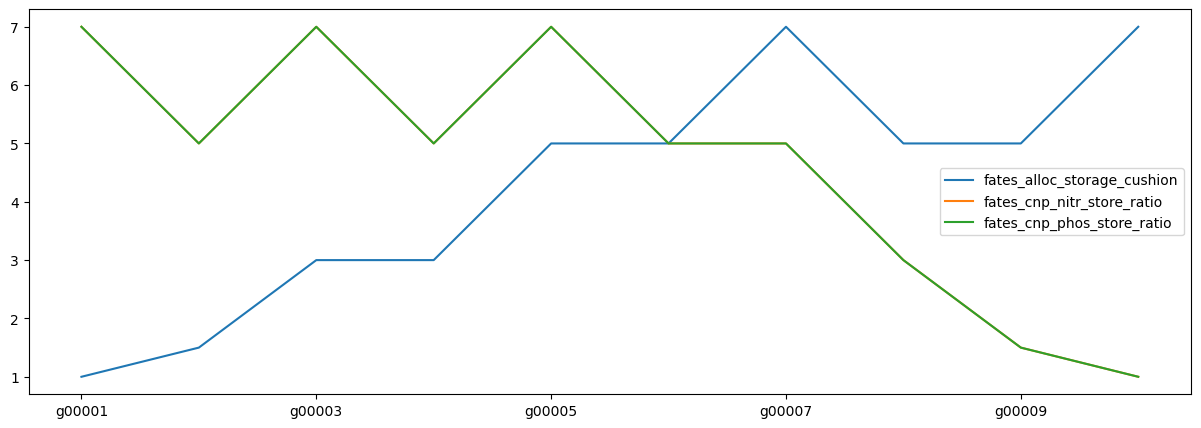

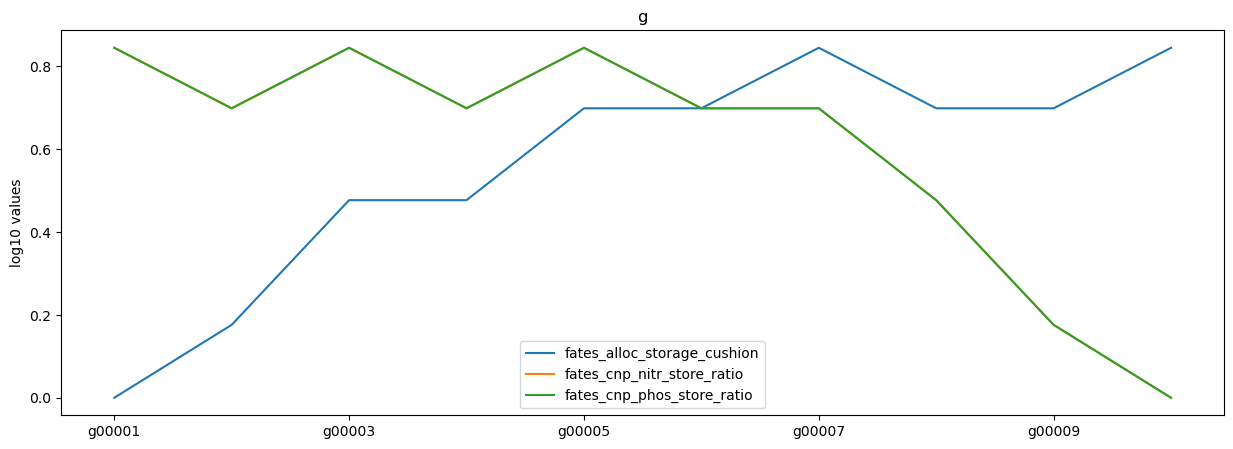

In [9]:

import pandas as pd

# Replace 'file.txt' with the path to your text file
df_params = pd.read_csv(f'{path_ensemble_vals}{ensemble_vals_fname}',
                        names= params_list,
                        delim_whitespace=True)
df_params.index = ['g{:05d}'.format(i+1) for i in range(len(df_params))]

# Display the DataFrame
print(df_params)

plt.figure(figsize=(15,5))
df_params.plot(figsize=(15,5))

# Take the logarithm base 10 of the DataFrame values
df_log10 = np.log10(df_params)

# Plot the columns

df_log10.plot(figsize=(15,5),title="g")
plt.ylabel('log10 values')
plt.savefig(f"{path_save}/Params_en.png")



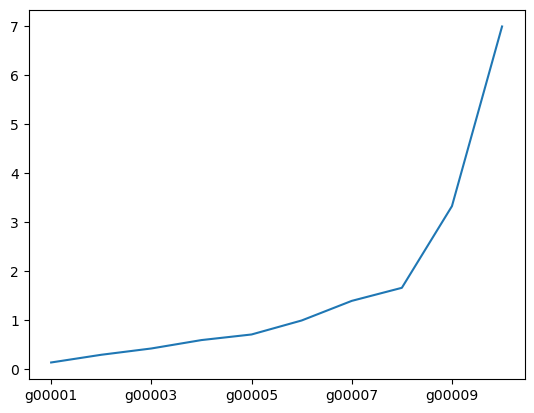

In [10]:
try:
    df_params["CN"] = df_params['fates_alloc_storage_cushion']/ df_params['fates_cnp_nitr_store_ratio']
    (df_params['fates_alloc_storage_cushion']/ df_params['fates_cnp_nitr_store_ratio']).plot()
except:
    pass

In [11]:
# Making a dataframe that will store the sum of first 20 years of GPP.



In [13]:
# extracting the timeseries of variables for selected variables and sites
dict_vars_data = {}
# also add the sum of n years of variable for sensitivity analysis
sum_n_years= 20
dict_param_sum_var = {}


variables = ["FATES_GPP",
             "FATES_NPP"]
for var in variables:
    dict_vars_data[var] = {}
    dict_param_sum_var[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        dict_param_sum_var[var] [site]={}
        dict_param_sum_var [var] [site] = df_params.copy(deep=True)
        for key in fnames.keys():
            if site in key: # Storing the ORNL and Duke data separately
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]
                sum_var = dict_vars_data[var][site][key.split("_")[-1]][:sum_n_years].sum().values
                dict_param_sum_var [var] [site] .loc [key.split("_")[-1], f"Sum_{var}"]  =  sum_var




R-squared for fates_alloc_storage_cushion: 0.9664425885731345
R-squared for fates_cnp_nitr_store_ratio: -0.3992873229346765
R-squared for fates_cnp_phos_store_ratio: -0.3992873229346765
Coefficient for fates_alloc_storage_cushion: [-1.15317681e-11]
Coefficient for fates_cnp_nitr_store_ratio: [6.76969591e-12]
Coefficient for fates_cnp_phos_store_ratio: [6.76969591e-12]


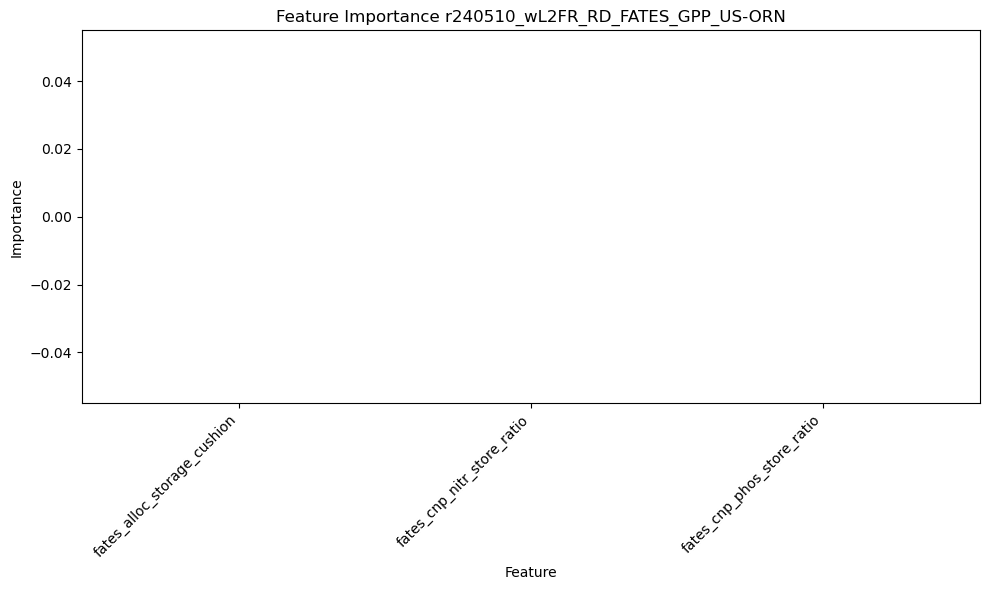

R-squared for fates_alloc_storage_cushion: 0.965264883007188
R-squared for fates_cnp_nitr_store_ratio: -0.38304218012181646
R-squared for fates_cnp_phos_store_ratio: -0.38304218012181646
Coefficient for fates_alloc_storage_cushion: [-1.7546832e-13]
Coefficient for fates_cnp_nitr_store_ratio: [1.02619844e-13]
Coefficient for fates_cnp_phos_store_ratio: [1.02619844e-13]


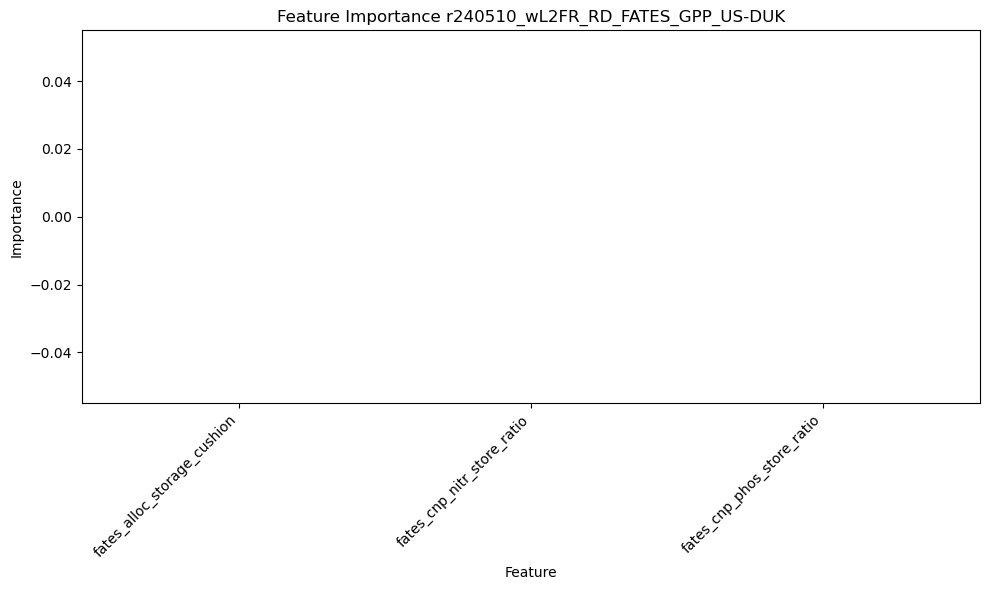

R-squared for fates_alloc_storage_cushion: 0.9674360935644603
R-squared for fates_cnp_nitr_store_ratio: -0.3991247912200995
R-squared for fates_cnp_phos_store_ratio: -0.3991247912200995
Coefficient for fates_alloc_storage_cushion: [-5.40355168e-12]
Coefficient for fates_cnp_nitr_store_ratio: [3.17154636e-12]
Coefficient for fates_cnp_phos_store_ratio: [3.17154636e-12]


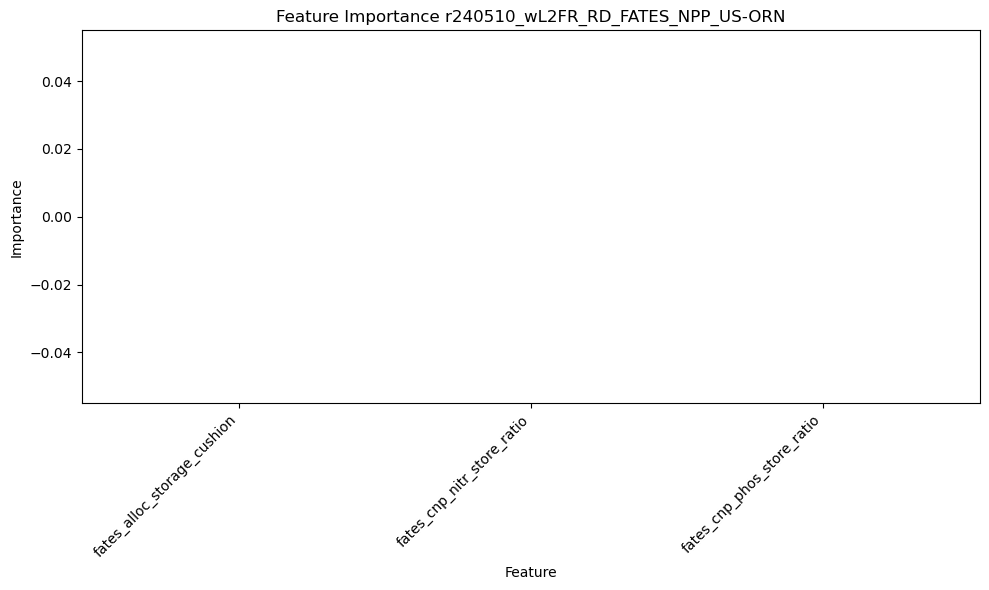

R-squared for fates_alloc_storage_cushion: 0.9652769343786077
R-squared for fates_cnp_nitr_store_ratio: -0.38311311357385125
R-squared for fates_cnp_phos_store_ratio: -0.38311311357385125
Coefficient for fates_alloc_storage_cushion: [-1.28012647e-13]
Coefficient for fates_cnp_nitr_store_ratio: [7.48667621e-14]
Coefficient for fates_cnp_phos_store_ratio: [7.48667621e-14]


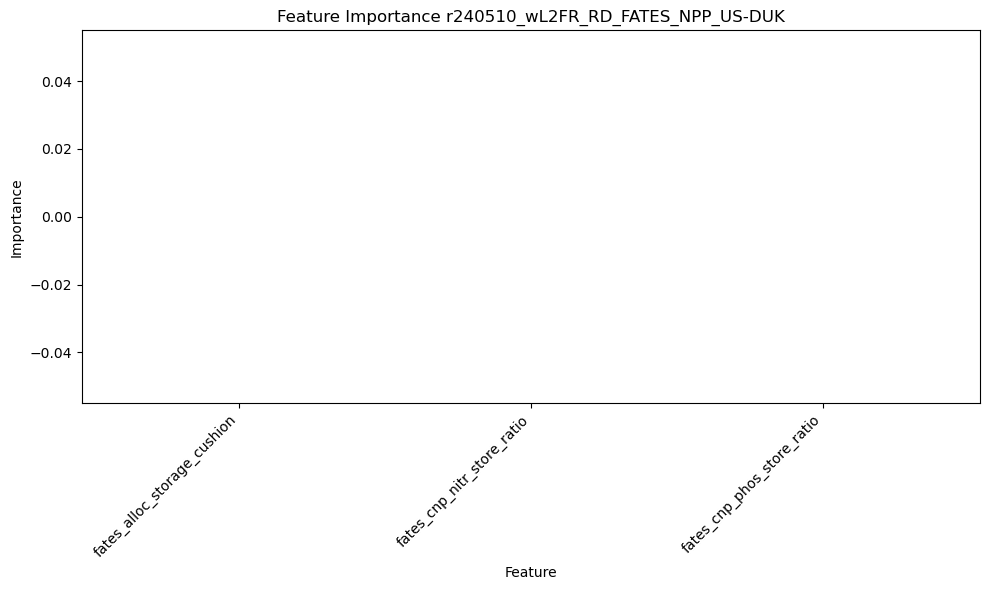

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#var = "FATES_GPP"
#site = "US-ORN"
for var in variables:
    for site in sites:
        df = dict_param_sum_var [var] [site].copy(deep =True)

        # Split dataset into features (parameters) and target variable (output)
        X = df[params_list]  # Features
        y = df[f"Sum_{var}"]  # Target variable

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit regression models for each parameter separately
        models = {}
        for param in X.columns:
            # Choose a regression model (e.g., Linear Regression, Random Forest)
            model = LinearRegression()  # Change this to RandomForestRegressor() for Random Forest

            # Fit the model
            model.fit(X_train[[param]], y_train)

            # Store the model
            models[param] = model

        # Evaluate model performance (e.g., R-squared)
        for param, model in models.items():
            score = model.score(X_test[[param]], y_test)
            print(f'R-squared for {param}: {score}')

        # Compare coefficients or feature importances
        for param, model in models.items():
            if isinstance(model, LinearRegression):
                print(f'Coefficient for {param}: {model.coef_}')
            elif isinstance(model, RandomForestRegressor):
                print(f'Feature importance for {param}: {model.feature_importances_}')
        # Assuming X_train and y_train are your training data
        # Train a RandomForestRegressor model
        model = RandomForestRegressor()
        model.fit(X_train, y_train)

        # Get feature importances from the trained model
        feature_importances = model.feature_importances_

        # Create a DataFrame to store feature importances
        importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

        # Sort the DataFrame by importance values
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        tmp_case_name = "_".join([case_id.split("_")[3],case_id.split("_")[4],case_id.split("_")[-1]])

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        plt.bar(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title(f'Feature Importance {tmp_case_name}_{var}_{site}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(f"{path_save}/Sensivity_{tmp_case_name}_{var}_{site}.png")
        plt.show()


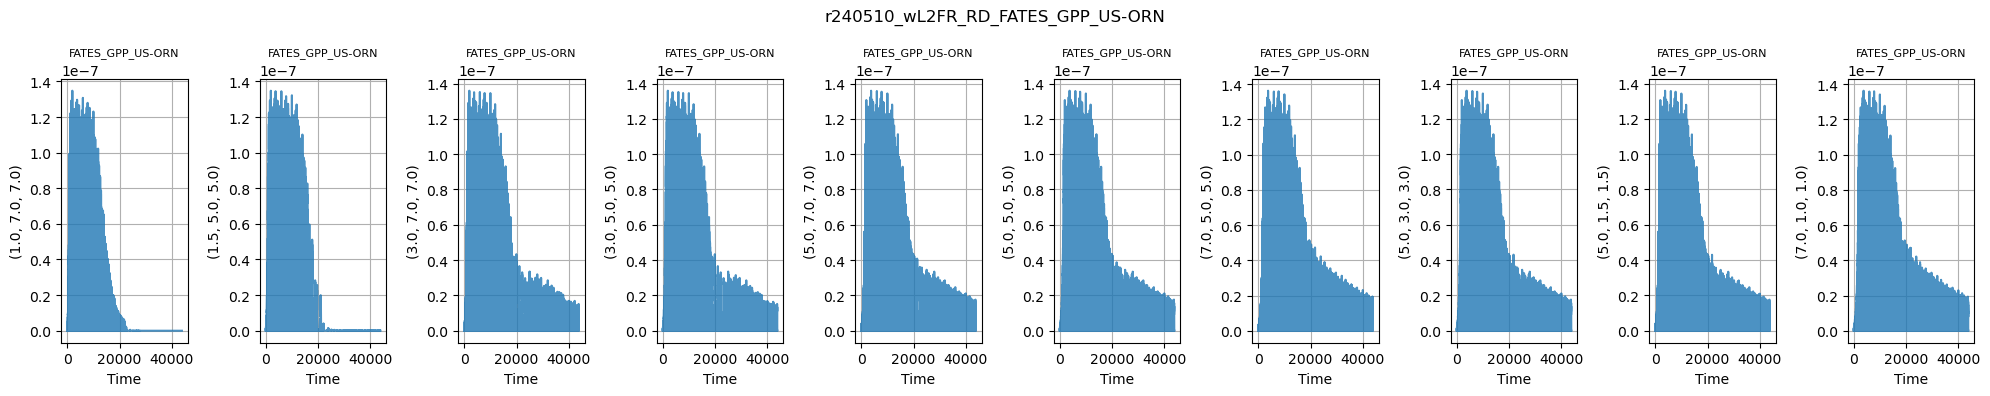

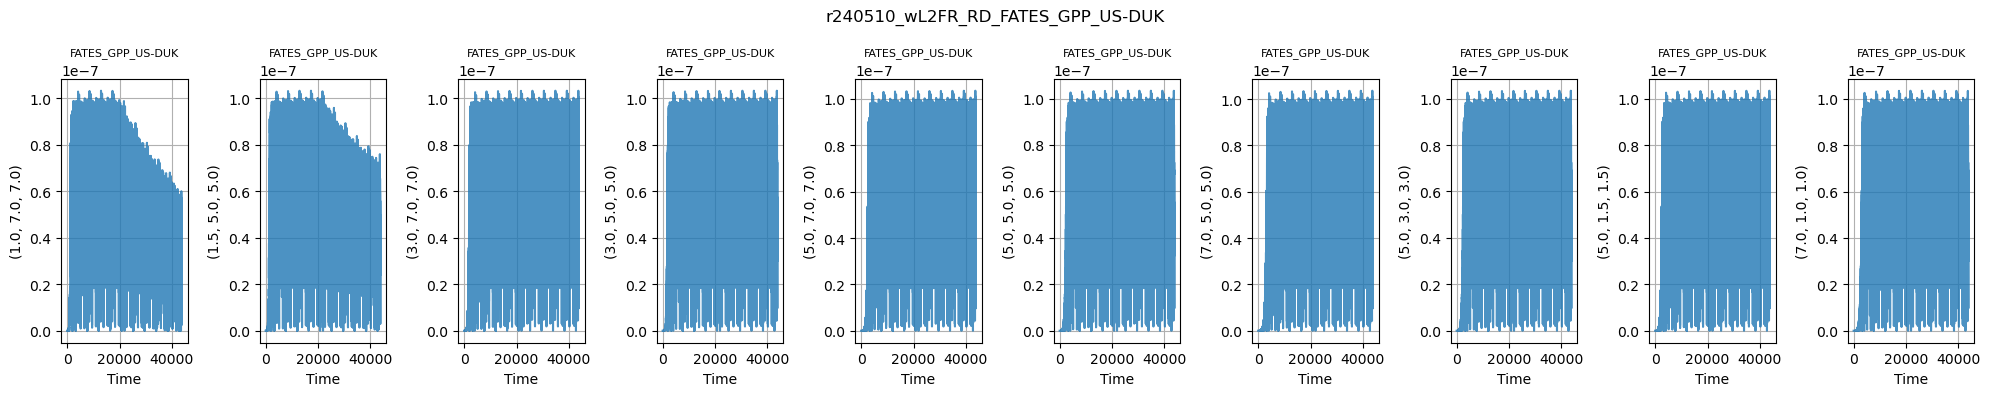

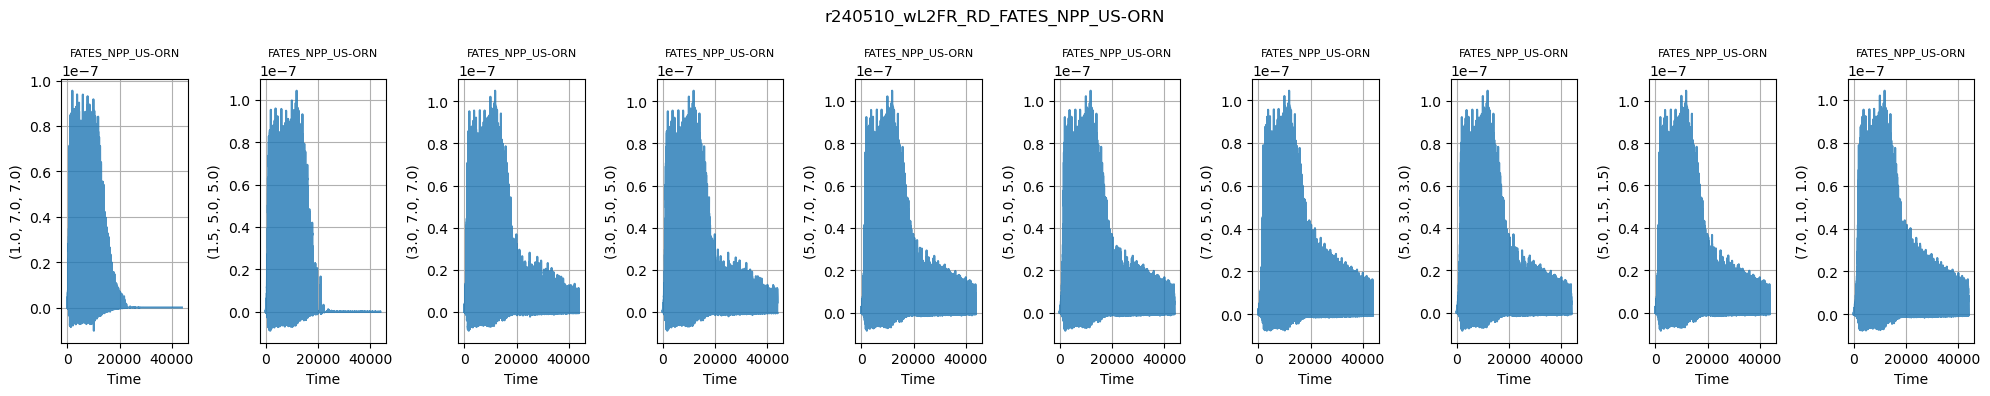

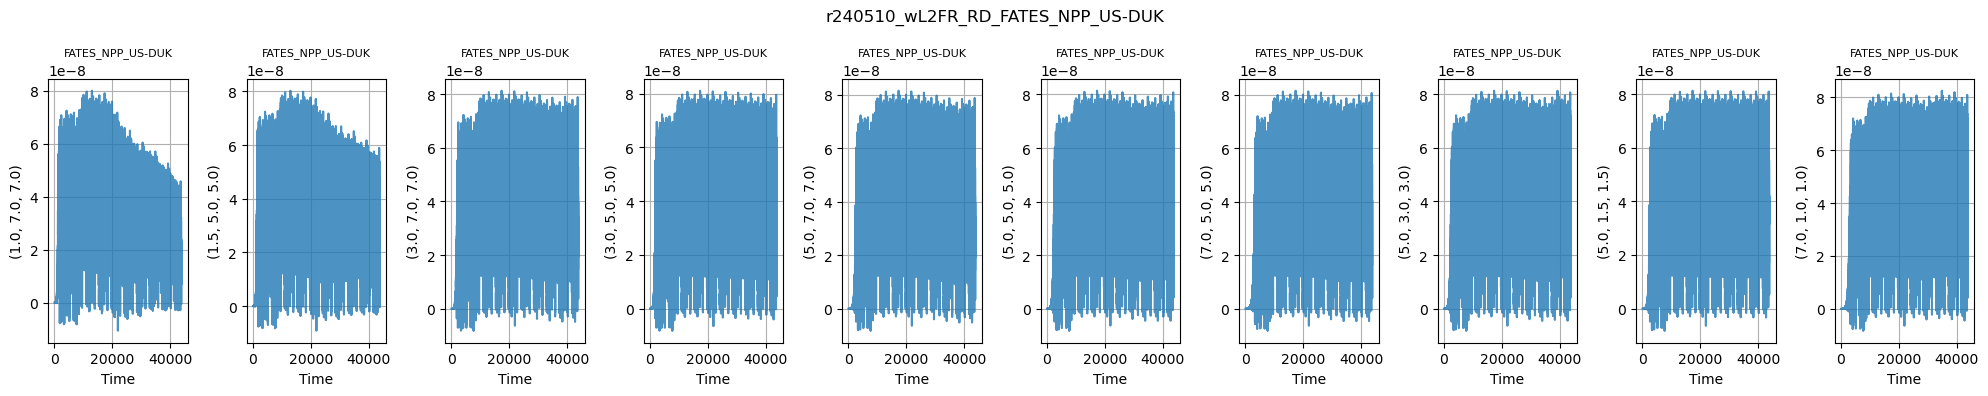

In [15]:
if True:
    for var in variables:
        for site in sites:
            df = dict_param_sum_var [var] [site].copy(deep =True)
            marker_styles = ['o', 's', '^', 'D', 'x', '*']
            fig, axes = plt.subplots(1, 10, figsize=(20, 4))
            for idx_row, index_row in enumerate (df.index):
                p1 = df.loc[index_row,"fates_alloc_storage_cushion"]
                p2 = df.loc[index_row,"fates_cnp_nitr_store_ratio"]
                p3 = df.loc[index_row,"fates_cnp_phos_store_ratio"]
                subset = df_params[(df_params[params_list[0]] == p1) &
                                            (df_params[params_list[1]] == p2) &
                                            (df_params[params_list[2]] == p3)]
                #for i, ax in enumerate(axes):
                ax = axes[idx_row]
                ax.plot(dict_vars_data[var][site][subset.index[0]], label=f'{(p1,p2,p3)}', alpha =0.8)
                ax.set_title(f'{var}_{site}',fontsize=8)
                ax.set_xlabel('Time')
                ax.set_ylabel(f'{(p1,p2,p3)}')
                ax.grid(True)
                #ax.legend()

            plt.suptitle(f'{tmp_case_name}_{var}_{site}')
            #plt.xlabel('Index')
            #plt.ylabel('Output Variable')
            #plt.legend()
            #plt.grid(True)
            plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{var}_{site}.png")
            plt.tight_layout()
            plt.show()


In [16]:
df_params

,fates_cnp_vmax_nh4,fates_cnp_vmax_no3,fates_cnp_vmax_p
g00001,1.000000e-10,1.000000e-10,1.000000e-10
g00002,1.000000e-09,1.000000e-09,1.000000e-09
g00003,1.000000e-08,1.000000e-08,1.000000e-08
g00004,1.000000e-07,1.000000e-07,1.000000e-07
g00005,1.000000e-06,1.000000e-06,1.000000e-06
g00006,1.000000e-05,1.000000e-05,1.000000e-05
g00007,1.000000e-04,1.000000e-04,1.000000e-04
g00008,1.000000e-03,1.000000e-03,1.000000e-03
g00009,1.000000e-02,1.000000e-02,1.000000e-02
g00010,1.000000e-01,1.000000e-01,1.000000e-01


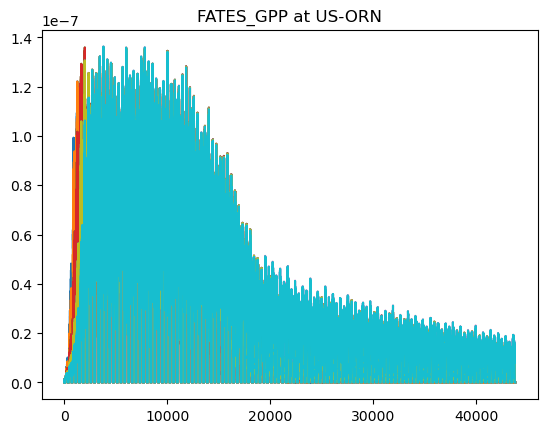

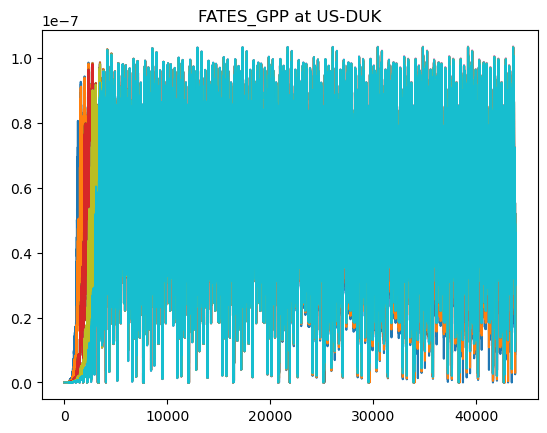

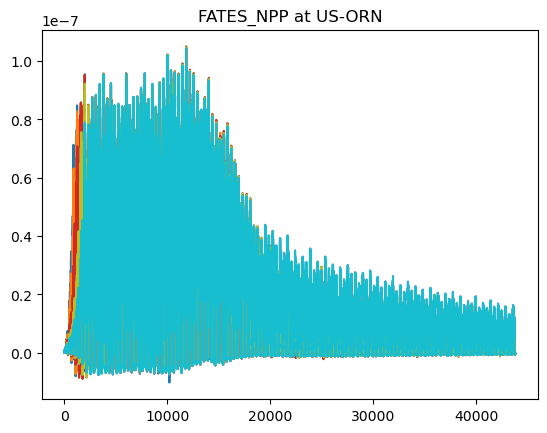

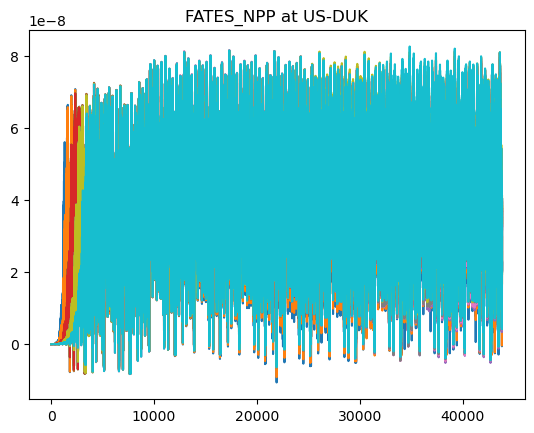

In [16]:
for var in variables:
    for site in sites:
        fig, ax = plt.subplots()
        for key in fnames.keys():
            if site in key:
                data = dict_vars_data[var][site][key.split("_")[-1]]
                ax.plot(data, label=key.split("_")[-1])
        ax.set_title(f"{var} at {site}")
        plt.show()


In [17]:
# how to check which variable affects GPP the most?
df_params[params_list[0]].unique()


array([1. , 1.5, 3. , 5. , 7. ])

print (params_list)
for p1 in df_params[params_list[0]].unique():
    plt.figure(figsize=(8, 6))
    for p2 in df_params[params_list[1]].unique():
        for p3 in df_params[params_list[2]].unique():
            subset = df_params[(df_params[params_list[0]] == p1) &
                                 (df_params[params_list[1]] == p2) &
                                 (df_params[params_list[2]] == p3)]
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'Param2={p2}, Param3={p3}', alpha =.2)
    plt.title(f'Output Variable vs. Parameter1 (Param1={p1})')
    plt.xlabel('Index')
    plt.ylabel('Output Variable')
    plt.legend()
    plt.grid(True)
    plt.show()


## Variable plots (selected Window) Input

In [18]:
# inputs
max_r_years = 31
selected_p1 = 5
selected_p2 = 5
selected_p3 = 5



FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


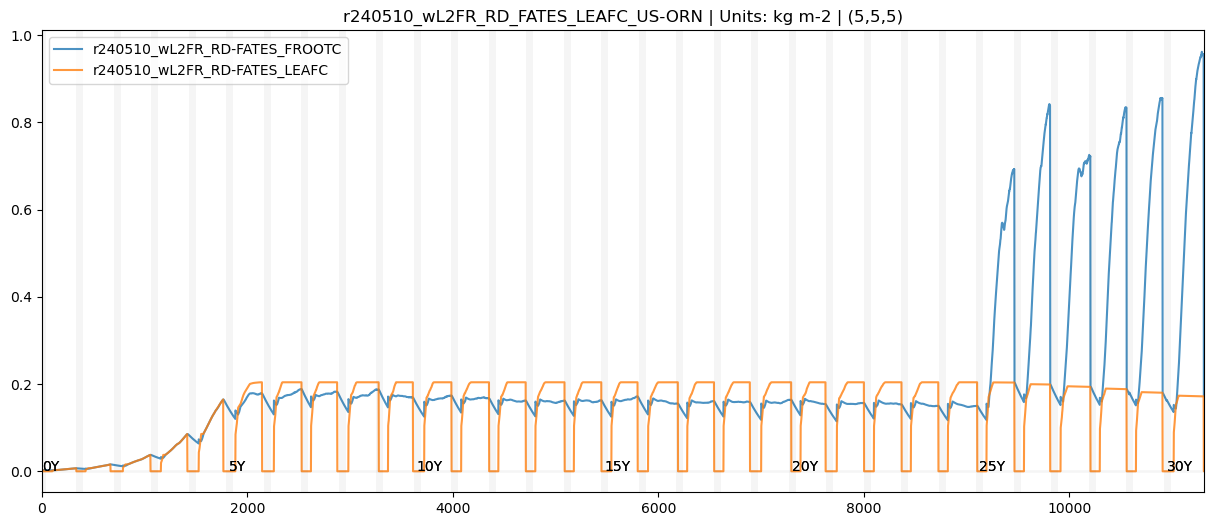

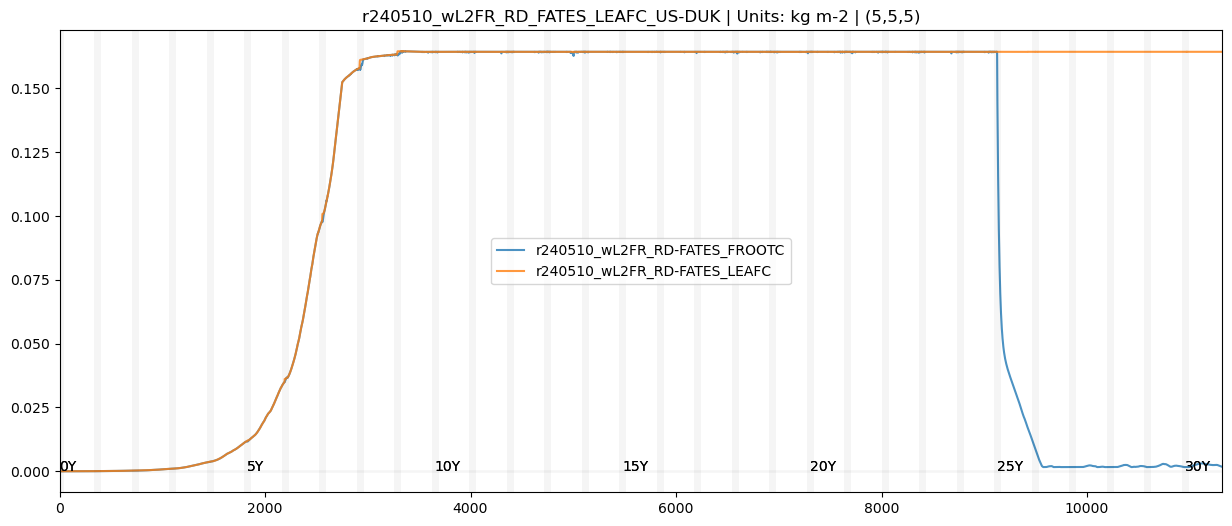

In [19]:
vars = (
    "FATES_FROOTC",
    "FATES_LEAFC",
)

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


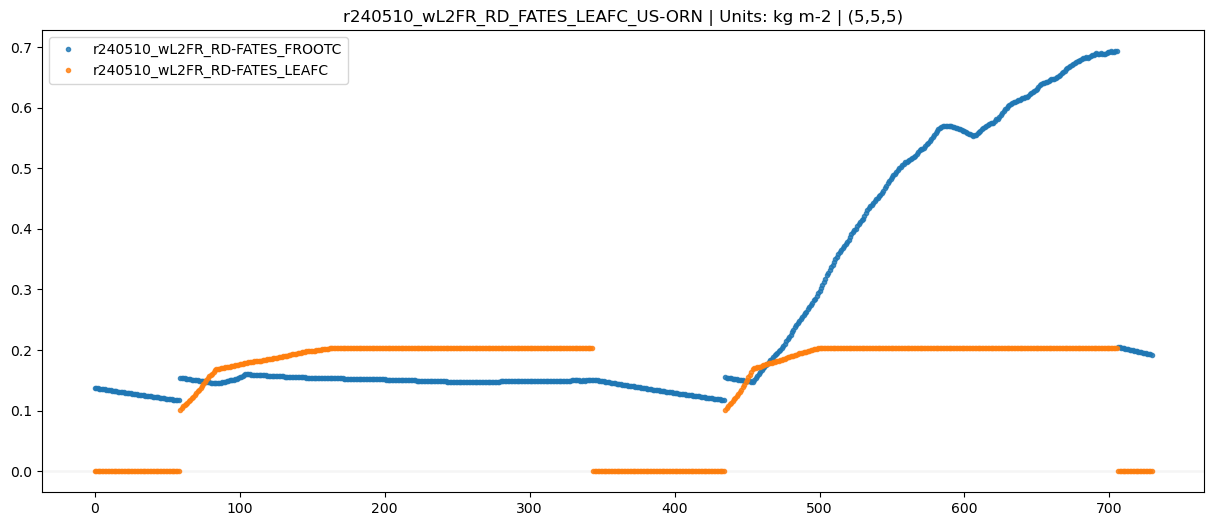

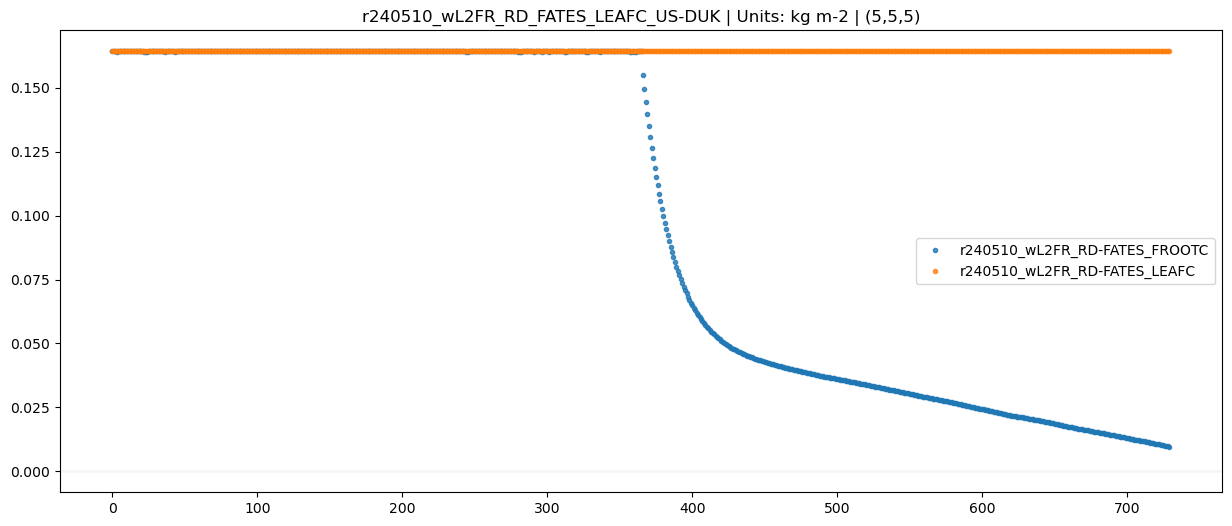

In [20]:
vars = (
    "FATES_FROOTC",
    "FATES_LEAFC",
)

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]][24*365:26*365], '.' , label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #if max_r_years > 0:
            #    plt.xlim(0,max_r_years*365)
            #for i in range(max_r_years):
            #    plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
            #    if i%5==0:
            #        plt.text(i*365,0, f"{int(i)}Y")
        #plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


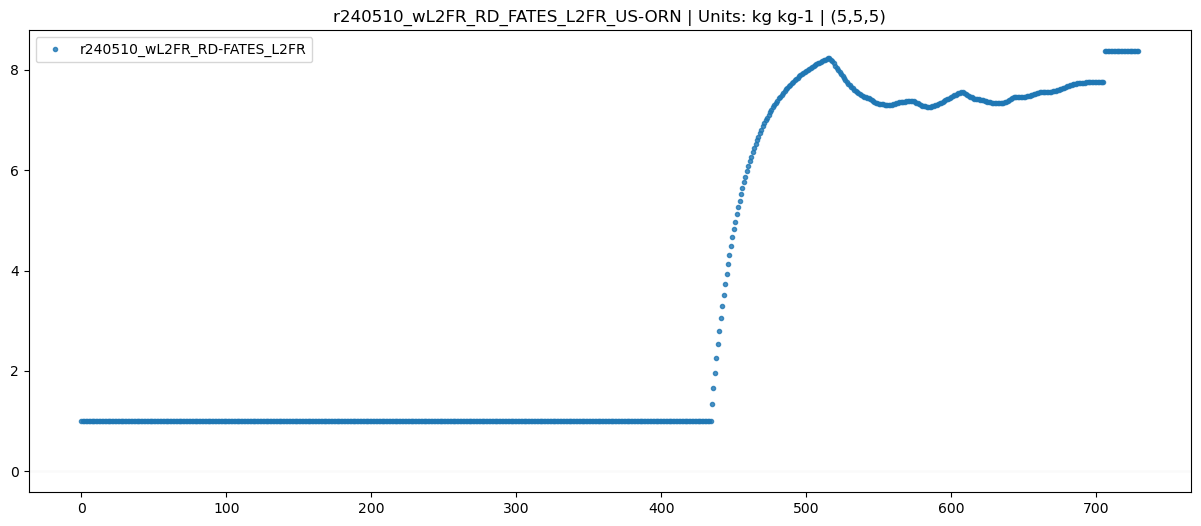

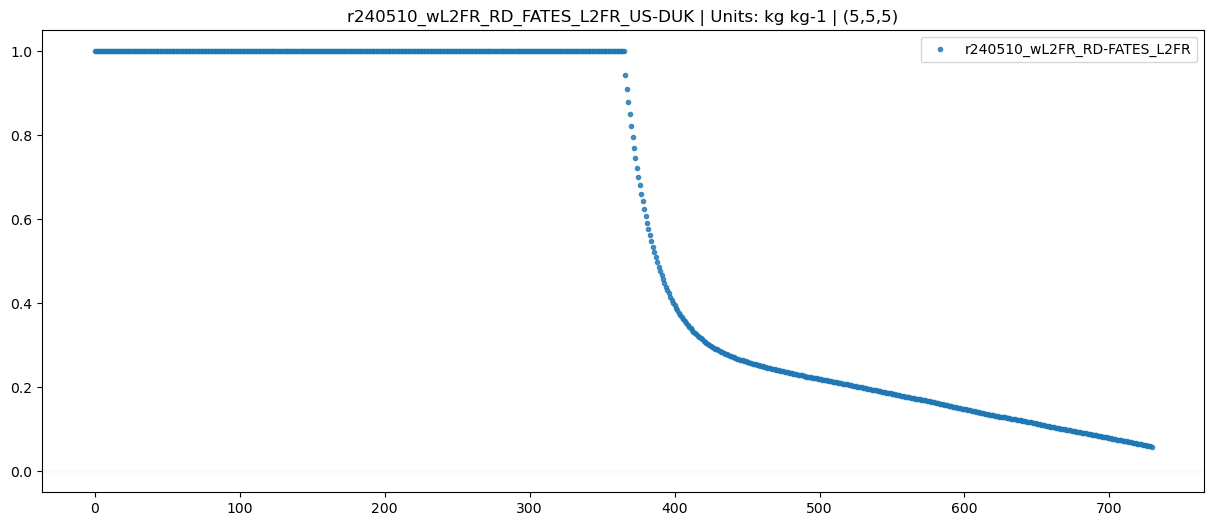

In [21]:
vars = (
    "FATES_L2FR",
    #"FATES_LEAFC",
)

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]][24*365:26*365], '.' , label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #if max_r_years > 0:
            #    plt.xlim(0,max_r_years*365)
            #for i in range(max_r_years):
            #    plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
            #    if i%5==0:
            #        plt.text(i*365,0, f"{int(i)}Y")
        #plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


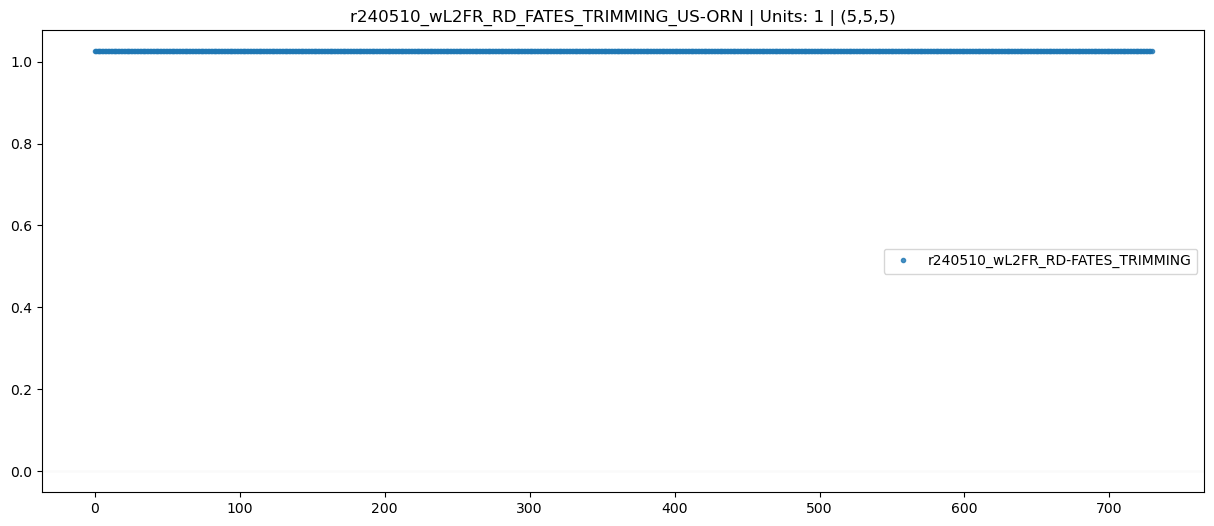

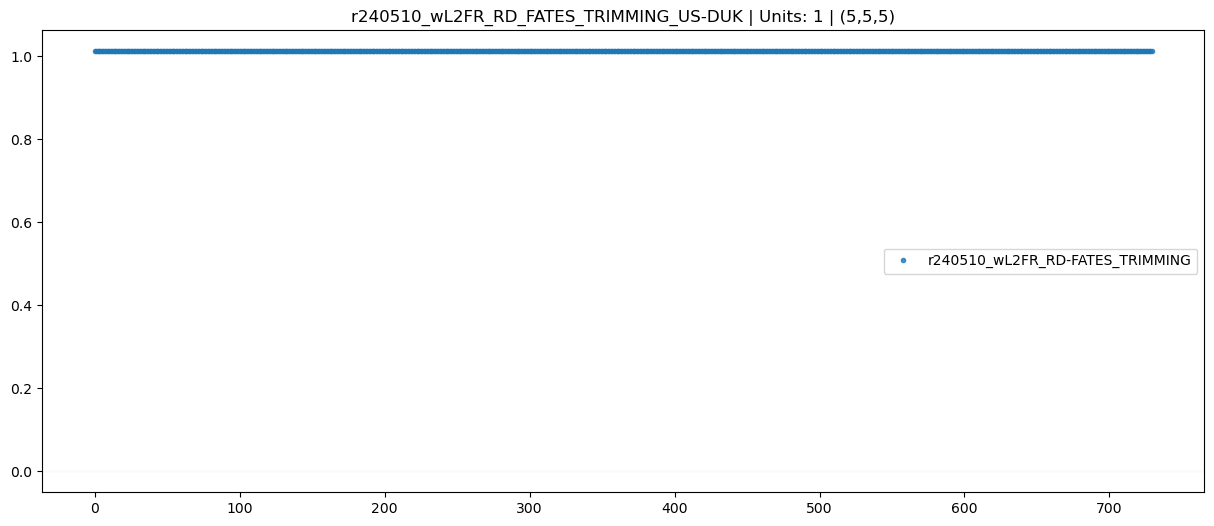

In [22]:
vars = (
    "FATES_TRIMMING",
    #"FATES_LEAFC",
)

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]][24*365:26*365], '.' , label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #if max_r_years > 0:
            #    plt.xlim(0,max_r_years*365)
            #for i in range(max_r_years):
            #    plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
            #    if i%5==0:
            #        plt.text(i*365,0, f"{int(i)}Y")
        #plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


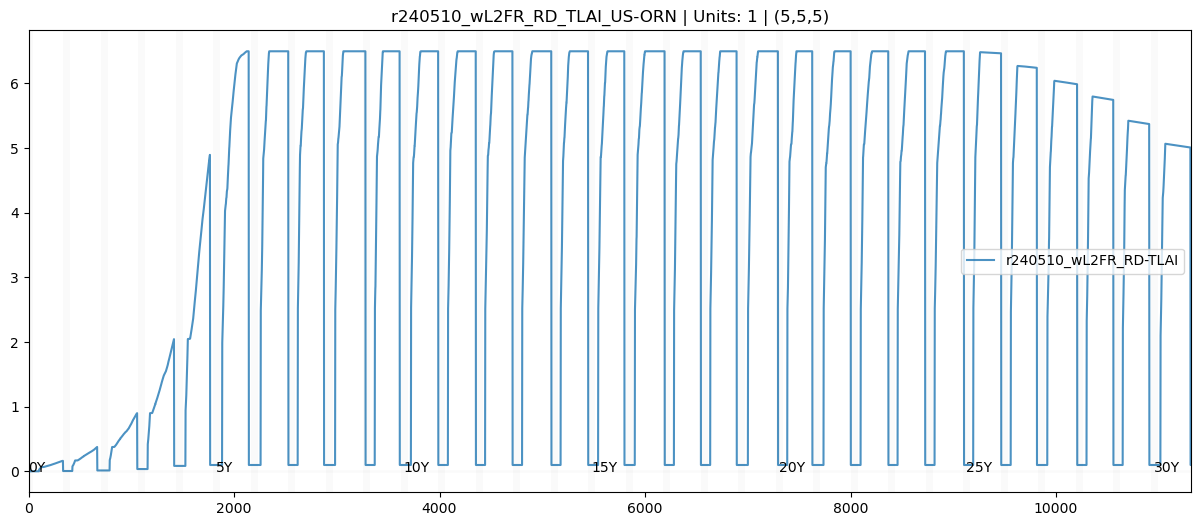

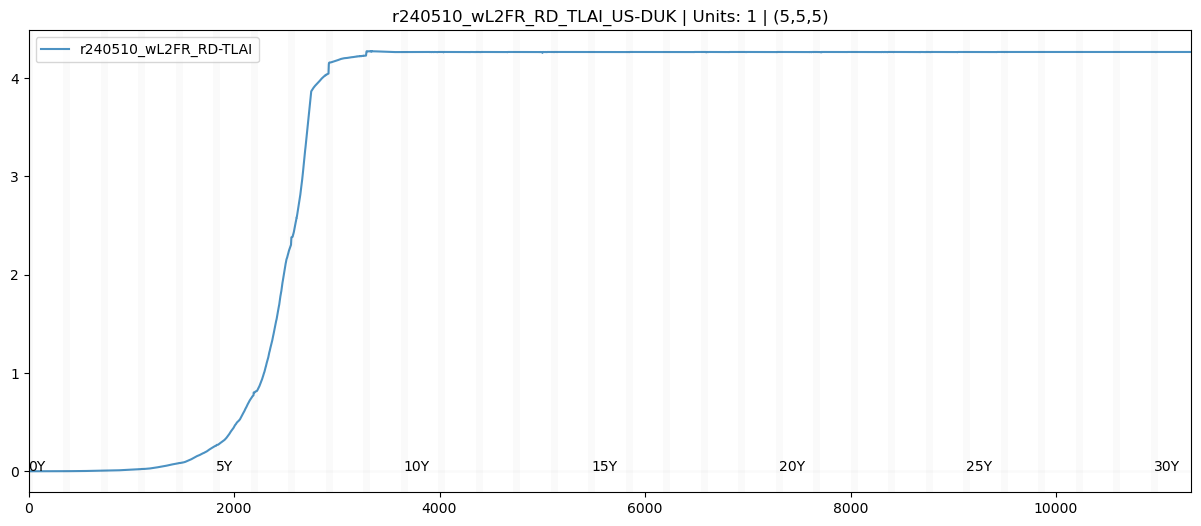

In [23]:
vars = (
    "TLAI",
)

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


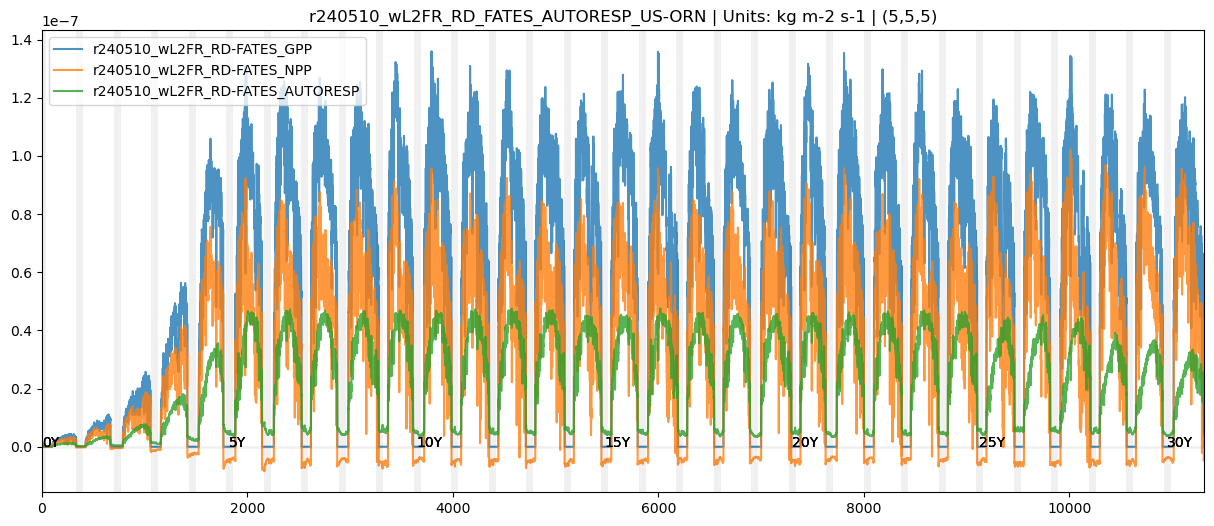

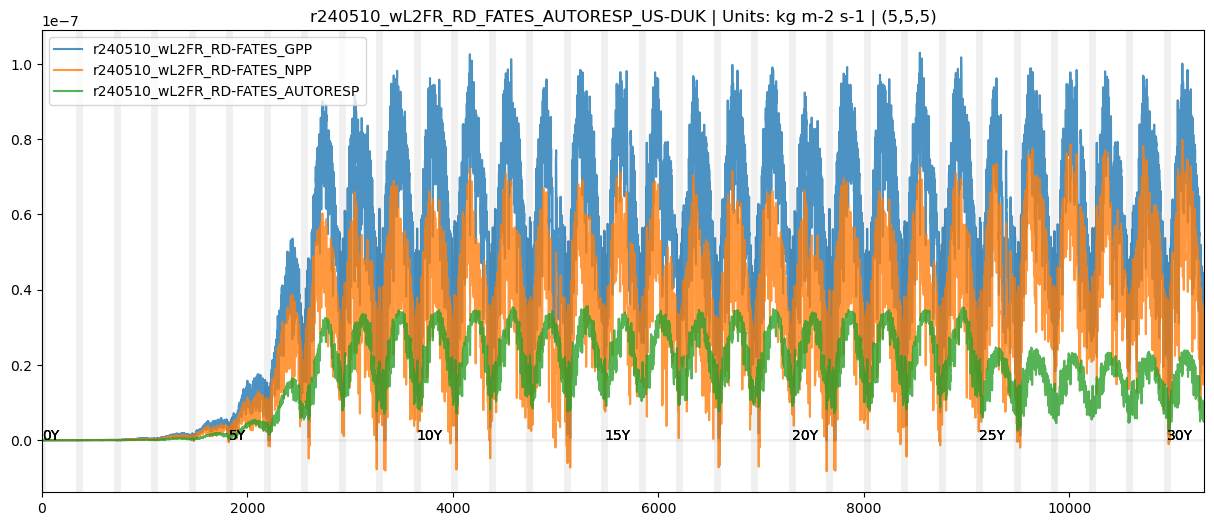

In [24]:
vars = ("FATES_GPP",
        "FATES_NPP",
        "FATES_AUTORESP",
       )

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


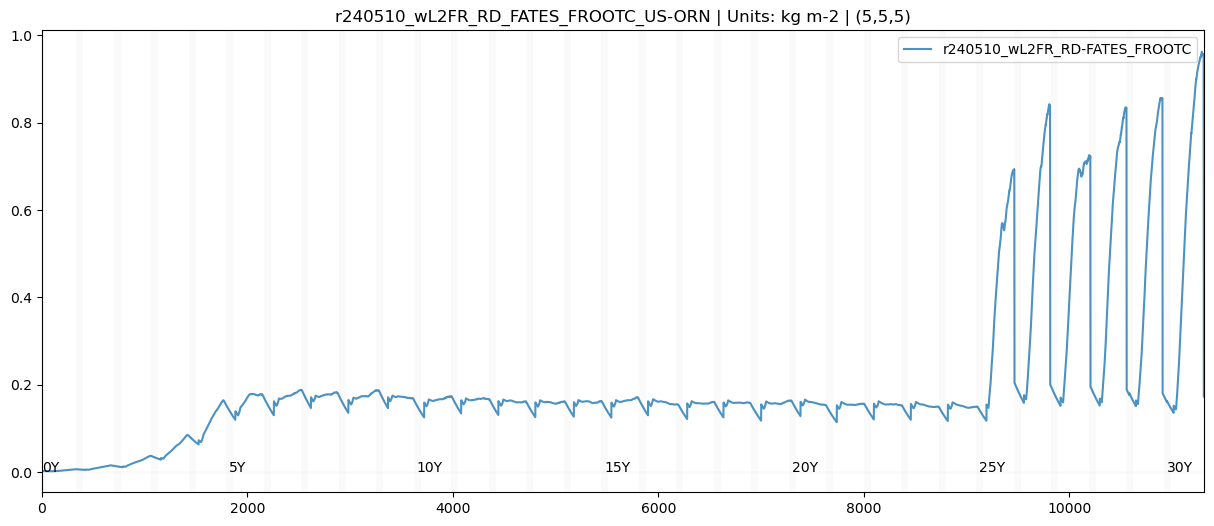

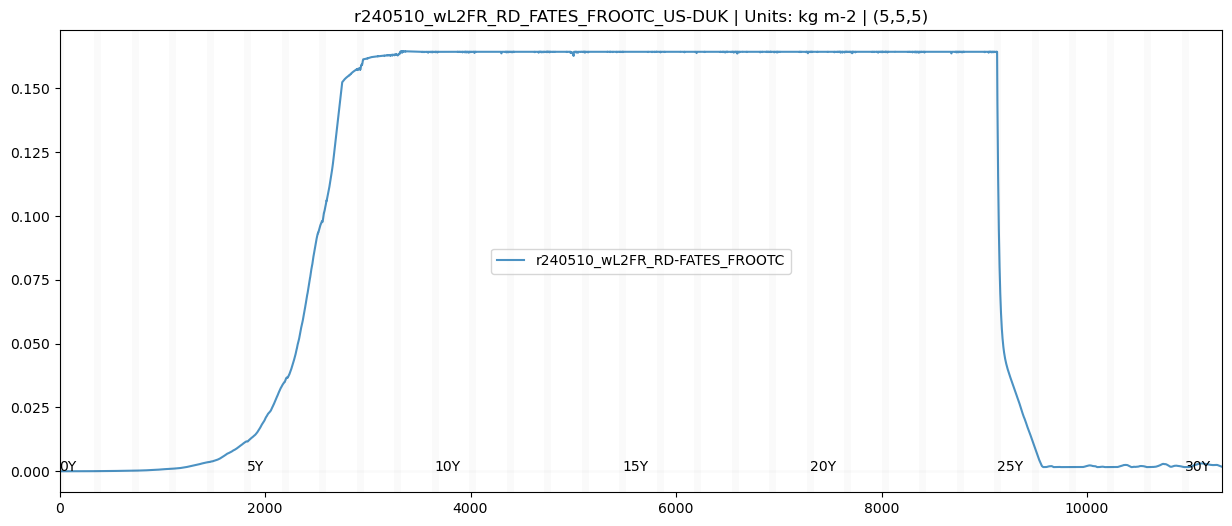

In [25]:
vars = (
            "FATES_FROOTC",
        #"FATES_LEAFC",
        #"FATES_STOREC",
    #"FATES_SAPWOODC",
       )

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


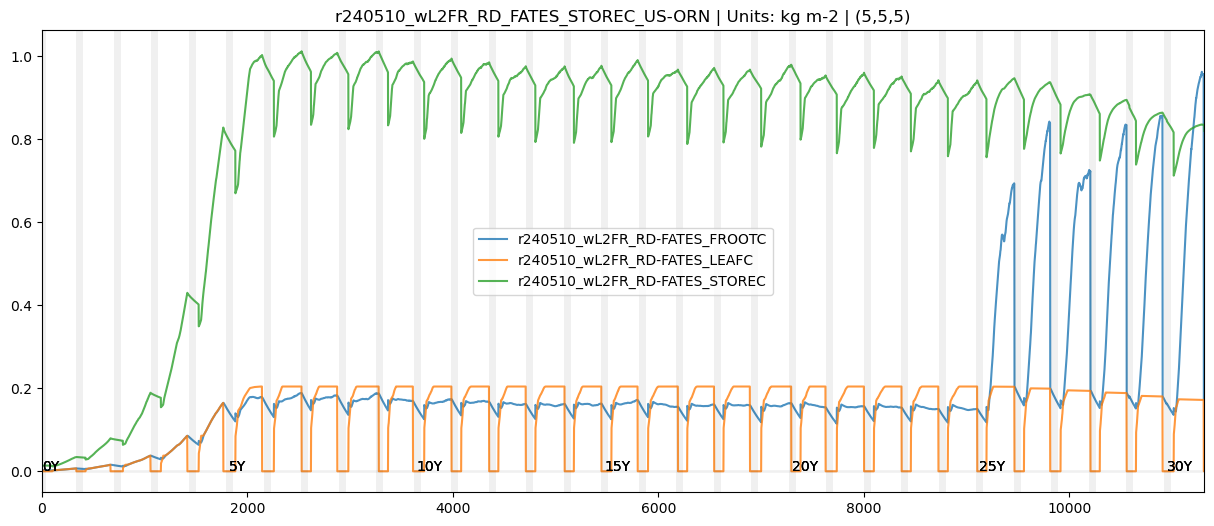

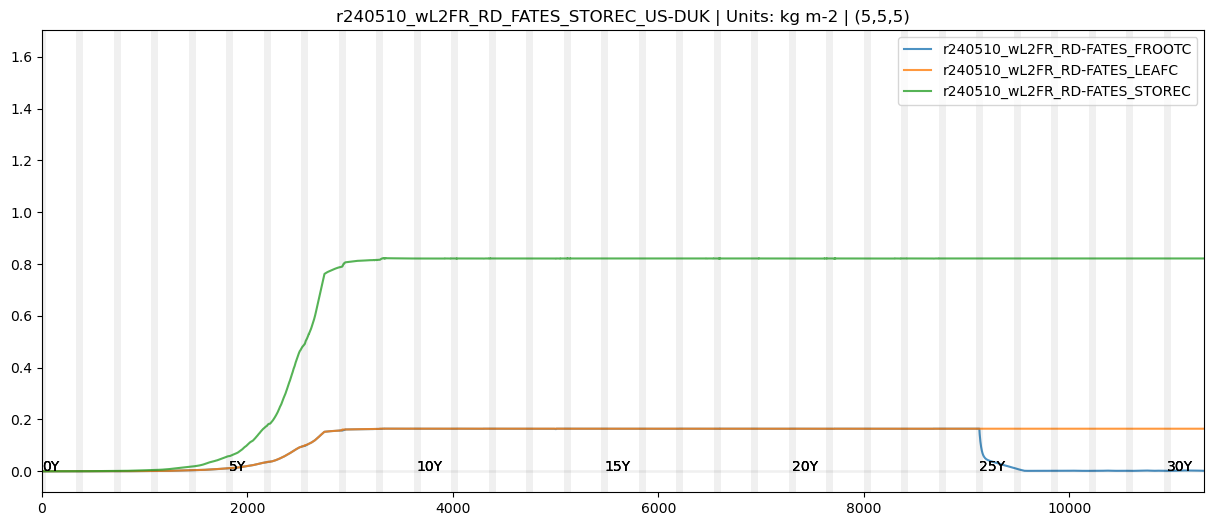

In [26]:
vars = (
            "FATES_FROOTC",
        "FATES_LEAFC",
        "FATES_STOREC",
    #"FATES_SAPWOODC",
       )

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FATES_STOREC_TF : Storage C fraction of target
FATES_STOREN_TF : storage N fraction of target
FATES_STOREC_TF : Storage C fraction of target
FATES_STOREN_TF : storage N fraction of target


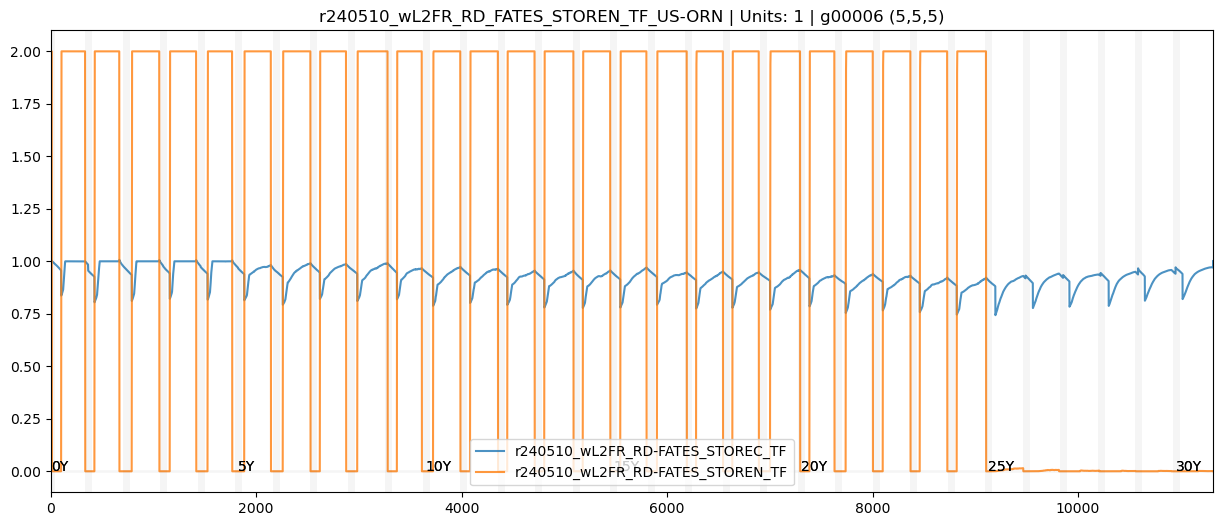

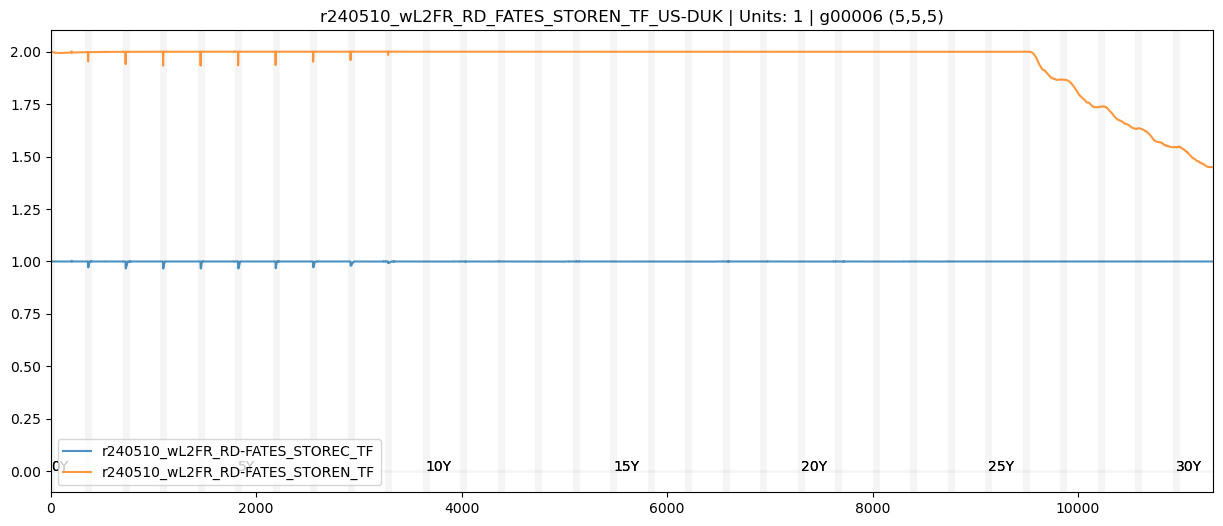

In [27]:
vars = (
        "FATES_STOREC_TF",
        "FATES_STOREN_TF"
        #"FATES_AUTORESP_USTORY"
       )


subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            print (var, ":", dict_vars_data[var][site][subset.index[0]].long_name)
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | {subset.index[0]} ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FATES_STOREC : total biomass in live plant storage in kg carbon per m2 land area
FATES_STOREN : total nitrogen in live plant storage
FATES_STOREC : total biomass in live plant storage in kg carbon per m2 land area
FATES_STOREN : total nitrogen in live plant storage


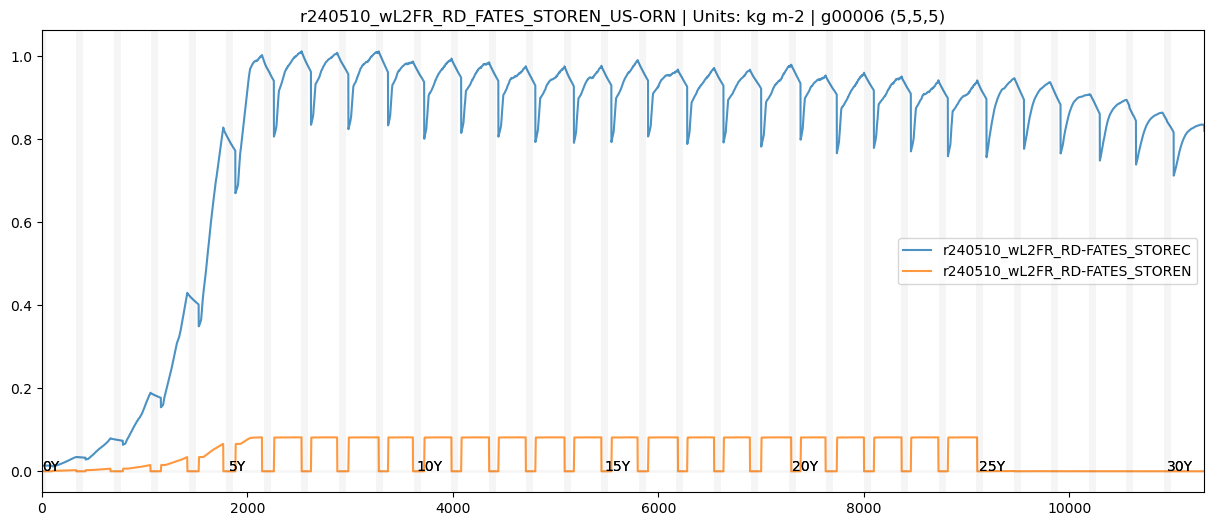

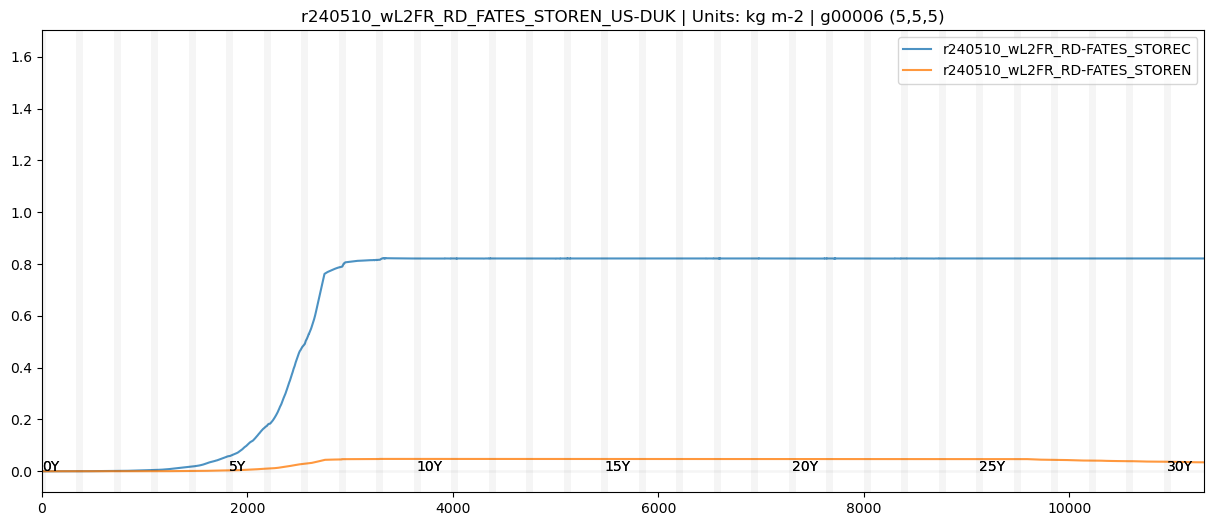

In [28]:
vars = (
        "FATES_STOREC",
        "FATES_STOREN"
        #"FATES_AUTORESP_USTORY"
       )


subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            print (var, ":", dict_vars_data[var][site][subset.index[0]].long_name)
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | {subset.index[0]} ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join("_".join(vars))}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FATES_STOREC : total biomass in live plant storage in kg carbon per m2 land area
FATES_STOREN : total nitrogen in live plant storage
FATES_STOREC : total biomass in live plant storage in kg carbon per m2 land area
FATES_STOREN : total nitrogen in live plant storage


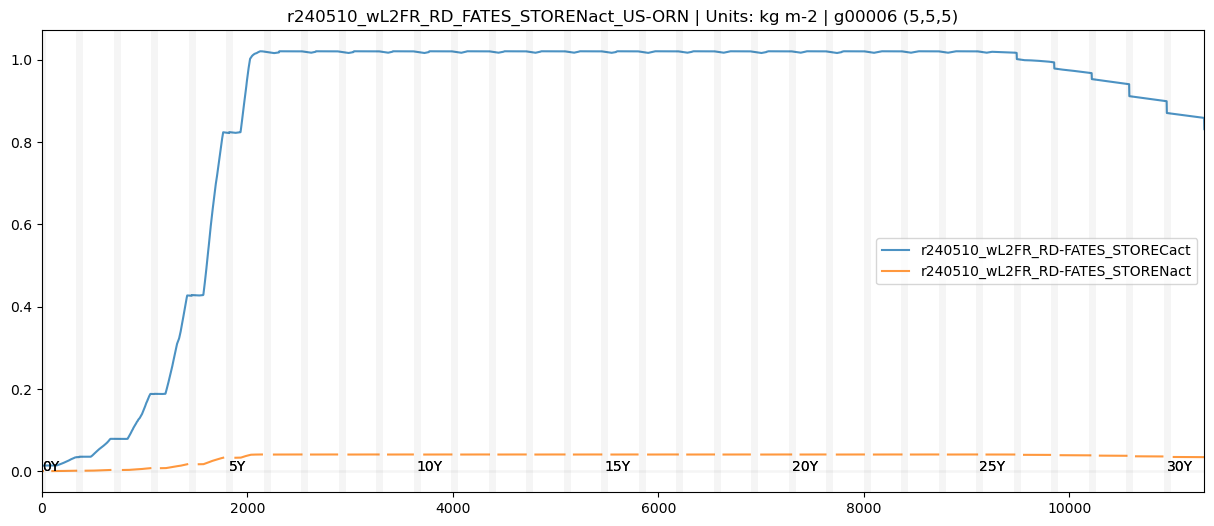

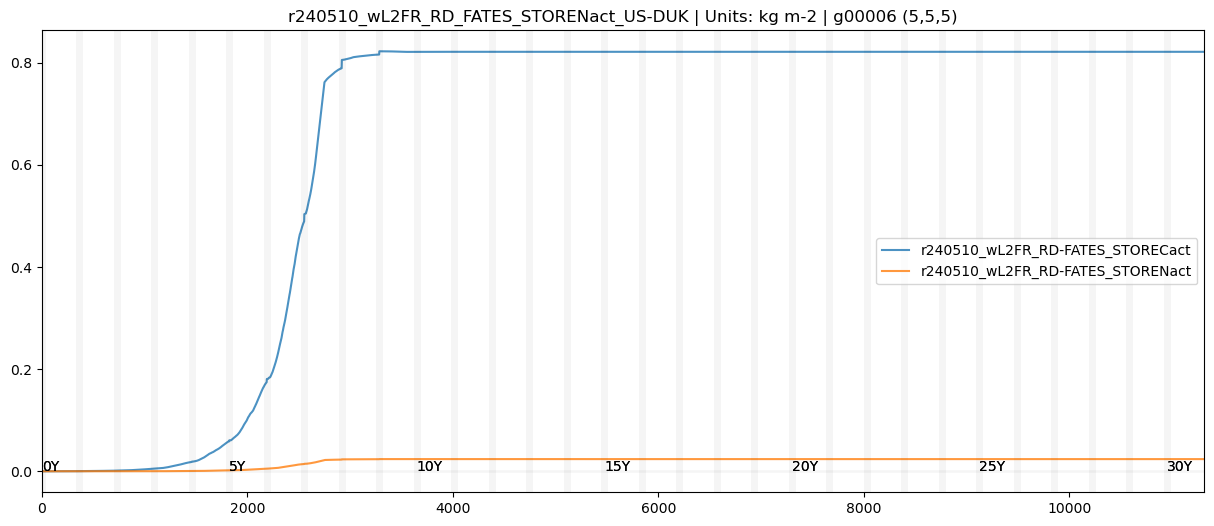

In [29]:
vars = (
        "FATES_STOREC",
        #"FATES_STOREC_TF",
        "FATES_STOREN",
        #"FATES_STOREN_TF"
        #"FATES_AUTORESP_USTORY"
       )


subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            print (var, ":", dict_vars_data[var][site][subset.index[0]].long_name)
            plt.plot(dict_vars_data[var][site][subset.index[0]]/dict_vars_data[var+'_TF'][site][subset.index[0]],
                     label=f'{tmp_case_name}-{var}act', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}act_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | {subset.index[0]} ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        #plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join("_".join(vars))}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006
FATES_STOREC_TF : Storage C fraction of target
FATES_STOREP_TF : storage P fraction of target
FATES_STOREC_TF : Storage C fraction of target
FATES_STOREP_TF : storage P fraction of target


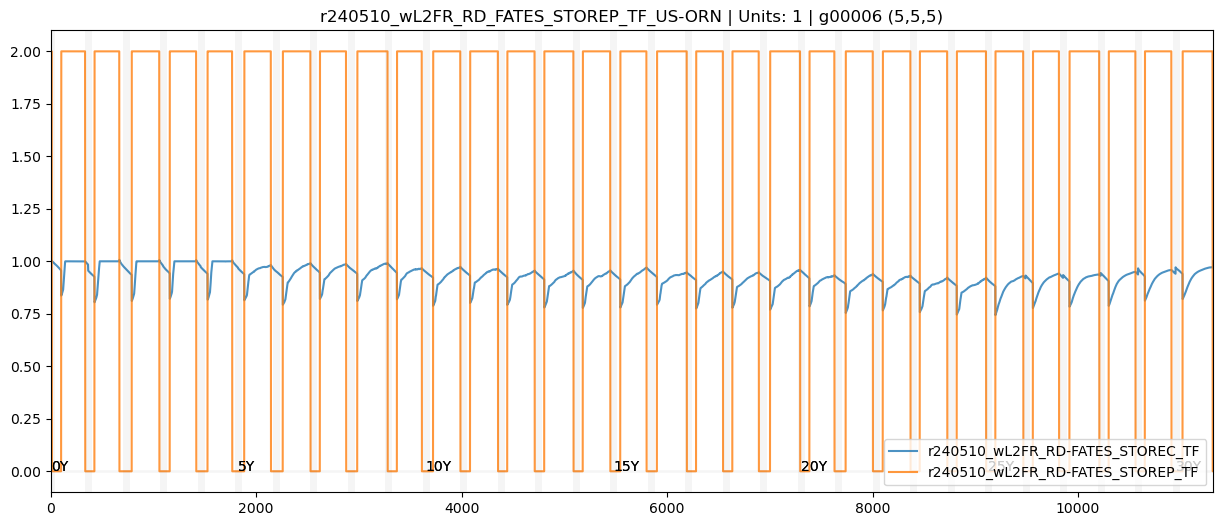

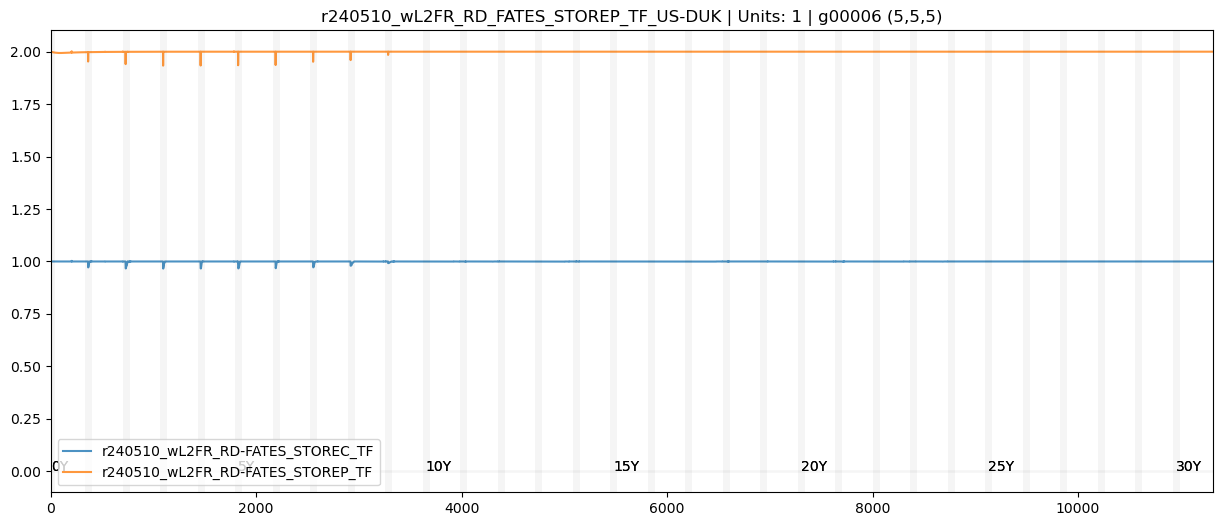

In [30]:
vars = (
        "FATES_STOREC_TF",
        "FATES_STOREP_TF"
        #"FATES_AUTORESP_USTORY"
       )


subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            print (var, ":", dict_vars_data[var][site][subset.index[0]].long_name)
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | {subset.index[0]} ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


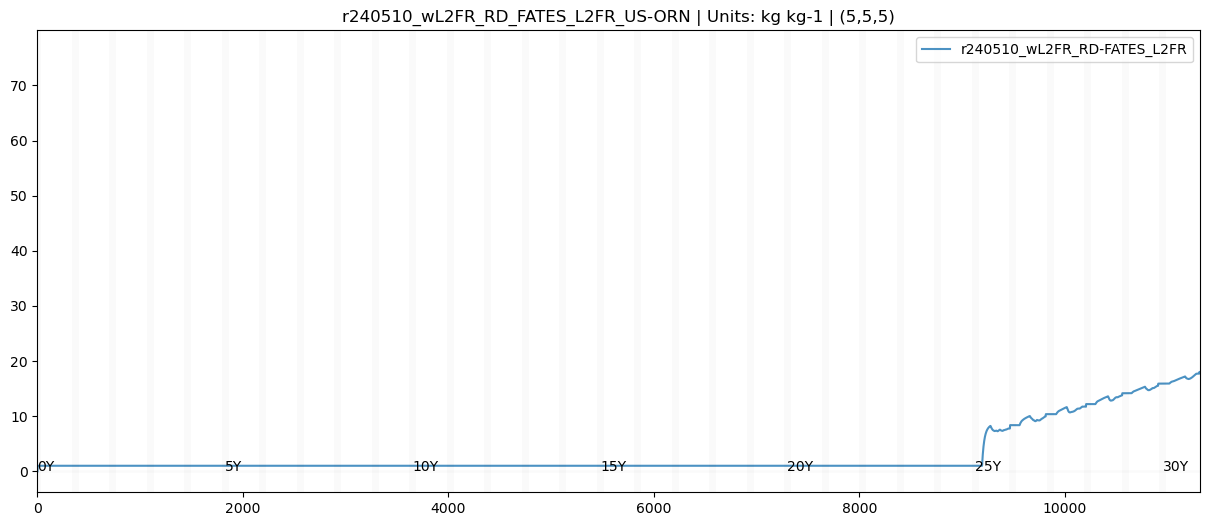

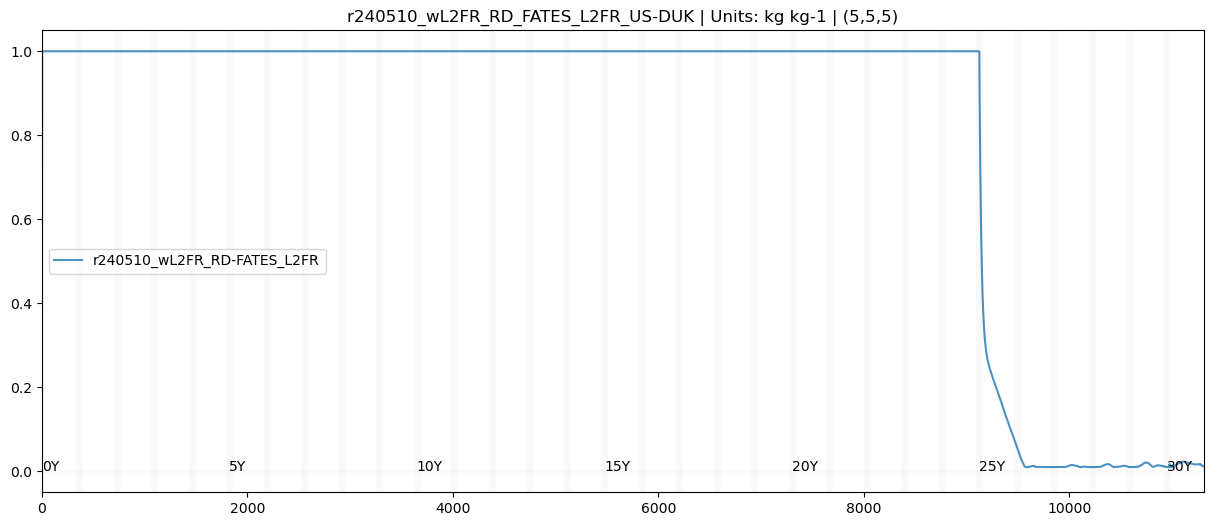

In [31]:

vars = (
        "FATES_L2FR",
        #"FATES_AUTORESP_USTORY"
       )

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


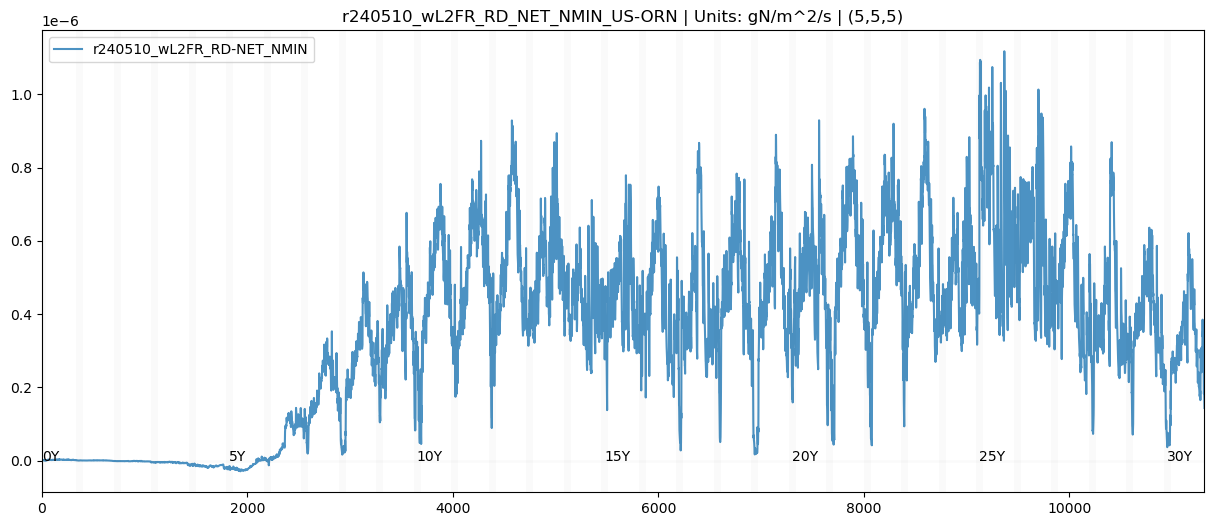

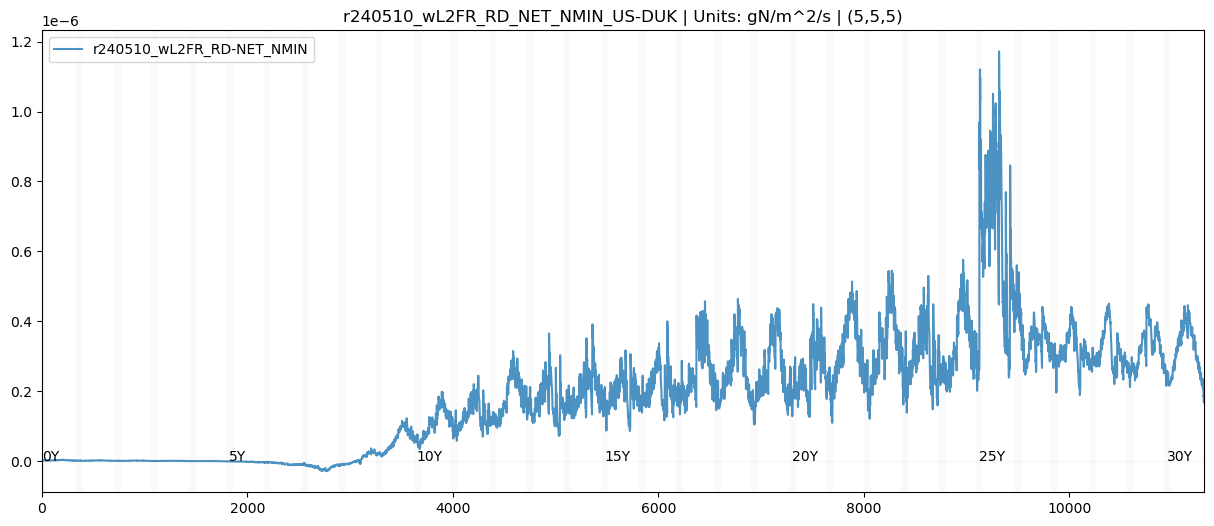

In [32]:

vars = (
        "NET_NMIN",
        #"FATES_AUTORESP_USTORY"
       )

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


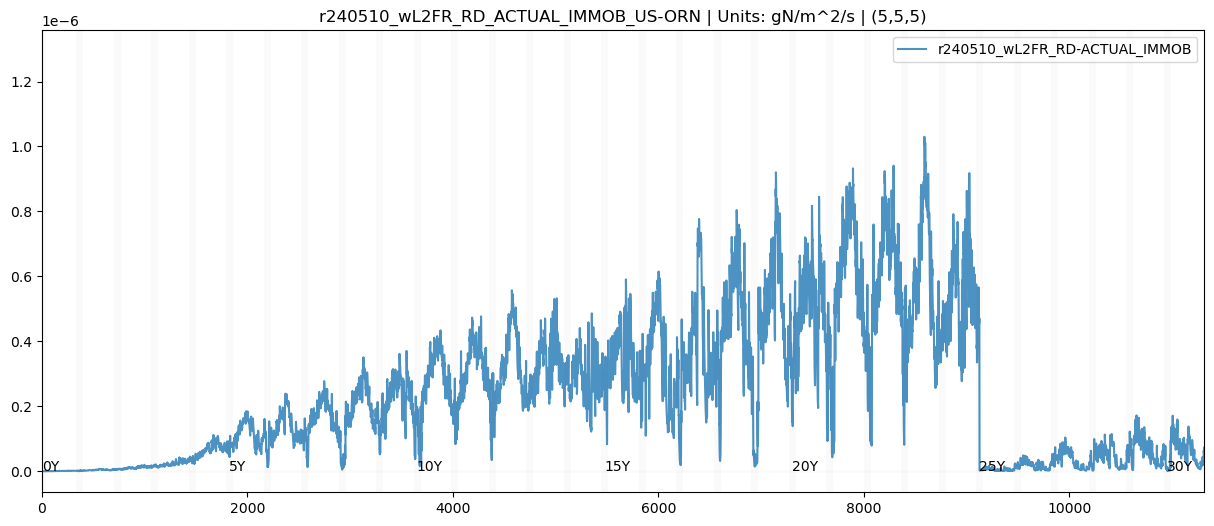

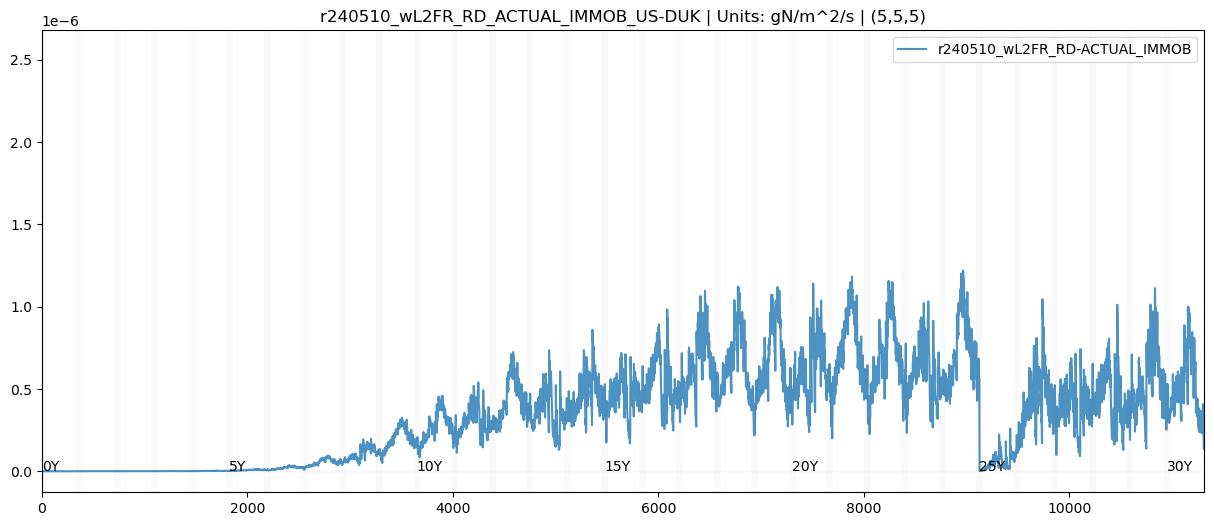

In [33]:
vars = (
        "ACTUAL_IMMOB",
        #"FATES_AUTORESP_USTORY"
       )

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


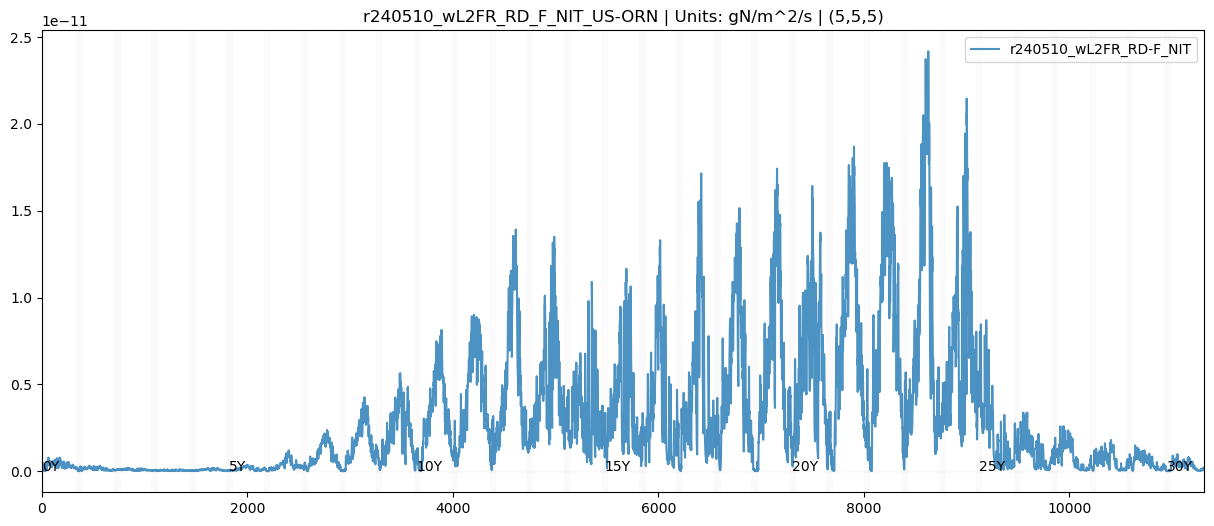

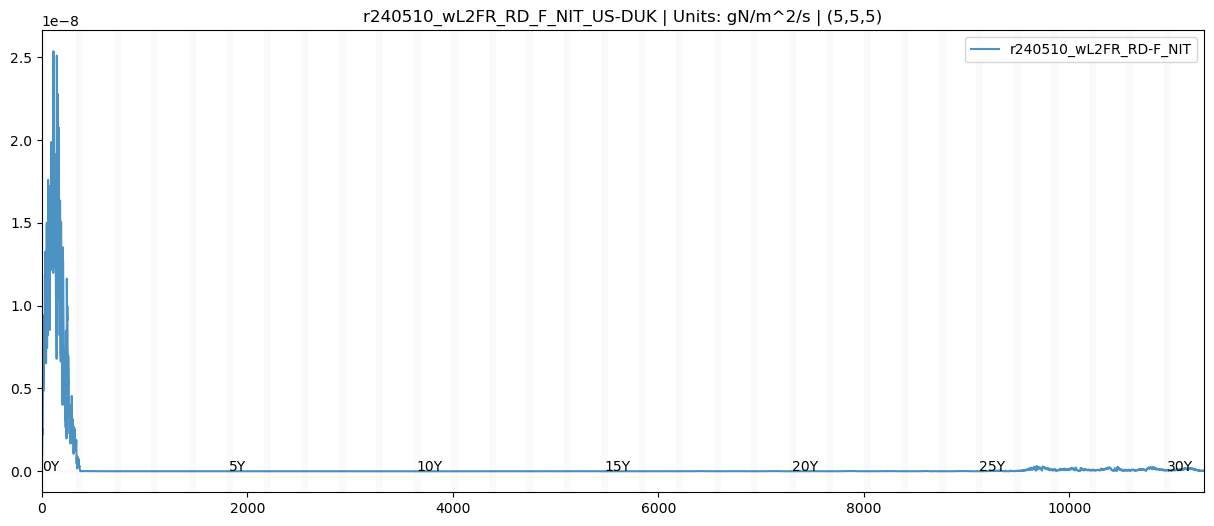

In [34]:

vars = (
        "F_NIT",
        #"FATES_AUTORESP_USTORY"
       )


subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmx_r240510_wL2FR_CONew_enCND_RD_US-DUK_spins_g00006


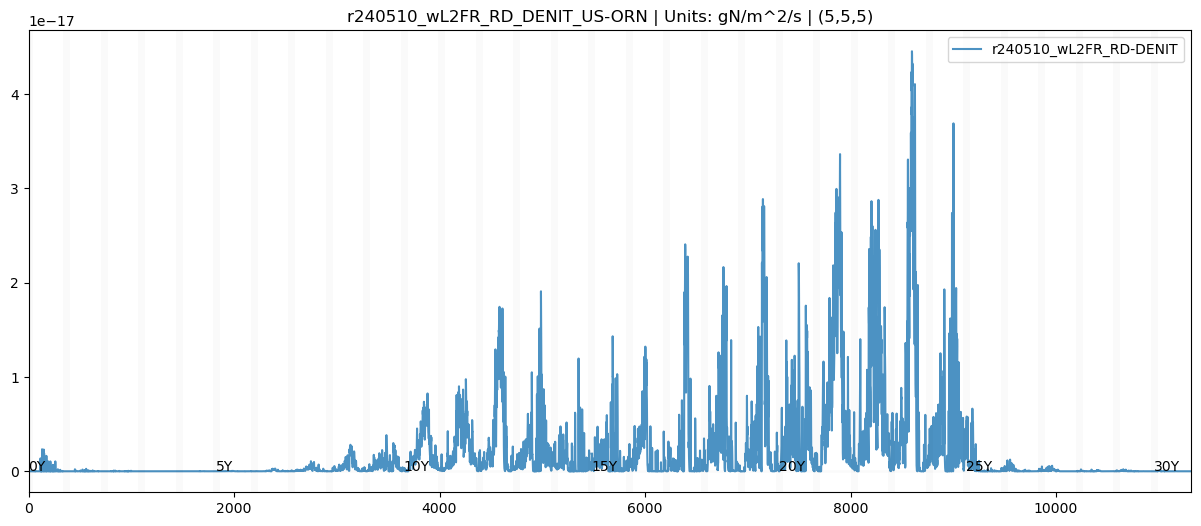

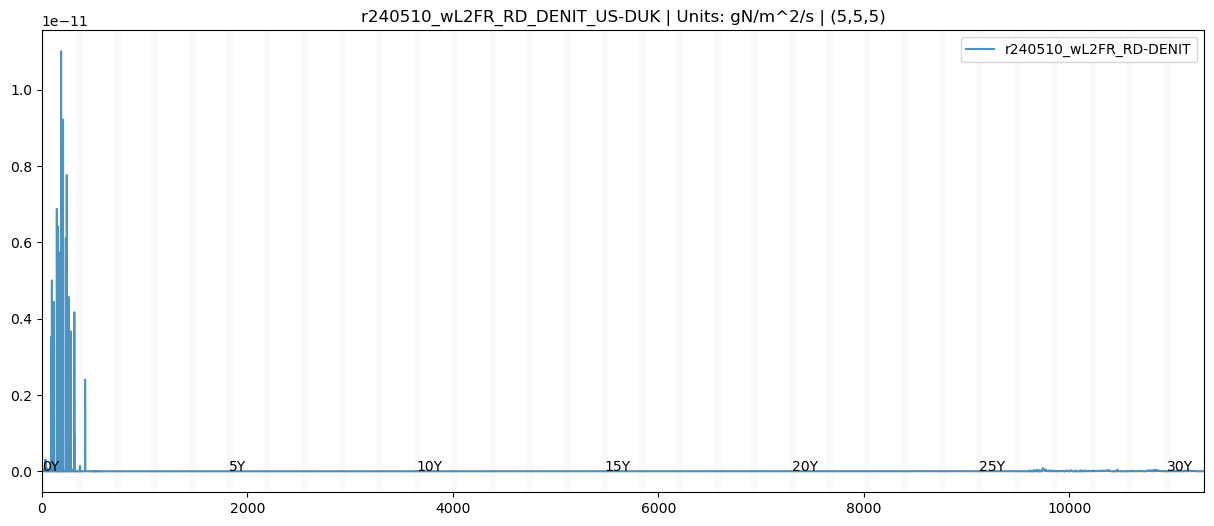

In [35]:

vars = (
        "DENIT",
        #"FATES_AUTORESP_USTORY"
       )


subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")
